<a href="https://colab.research.google.com/github/swapnil2304/Own-chat-GPT/blob/main/Themed_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!pip install pydicom

In [ ]:
!pip install tensorflow numpy matplotlib pydicom segmentation_models

In [ ]:
# loading files to unzip the image data
import os
import zipfile

# Defining the path to the uploaded ZIP file and the extraction directory
zip_path = '/content/drive/MyDrive/3Dircadb1.zip'
extract_to = '/content/drive/MyDrive/Colab Notebooks'

# Extracting the ZIP file
def extract_zip(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

# Extracting the uploaded ZIP file
extract_zip(zip_path, extract_to)

# Listing the contents of the extracted directory
extracted_files = []
for root, dirs, files in os.walk(extract_to):
    for file in files:
        extracted_files.append(os.path.join(root, file))

extracted_files[:10]  # Displaying the first 10 files for verification and confirmation

['/content/drive/MyDrive/Colab Notebooks/TVadvert.ipynb',
 '/content/drive/MyDrive/Colab Notebooks/4_Classification-lab.ipynb',
 '/content/drive/MyDrive/Colab Notebooks/Untitled0.ipynb',
 '/content/drive/MyDrive/Colab Notebooks/Untitled1 (3).ipynb',
 '/content/drive/MyDrive/Colab Notebooks/6_resample-lab.ipynb',
 '/content/drive/MyDrive/Colab Notebooks/Untitled2.ipynb',
 '/content/drive/MyDrive/Colab Notebooks/Tutorial2_DT_SVM_regression_classification (1).ipynb',
 '/content/drive/MyDrive/Colab Notebooks/Untitled (7)',
 '/content/drive/MyDrive/Colab Notebooks/Untitled3.ipynb',
 '/content/drive/MyDrive/Colab Notebooks/Tutorial2_DT_SVM_regression_classification.ipynb']

In [ ]:
# There are inner zip files present inside the dataset so in order to process the inner zip files I tried extracting
# First zip file 3Dircadb1.1
# Code for extracting inner ZIP files if any
def extract_inner_zip(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

# Extracting the inner ZIP files from 3Dircadb1.1 file
inner_zip_files = [
    '/content/drive/MyDrive/Colab Notebooks/3Dircadb1/3Dircadb1.1/LABELLED_DICOM.zip',
    '/content/drive/MyDrive/Colab Notebooks/3Dircadb1/3Dircadb1.1/MASKS_DICOM.zip',
    '/content/drive/MyDrive/Colab Notebooks/3Dircadb1/3Dircadb1.1/MESHES_VTK.zip',
    '/content/drive/MyDrive/Colab Notebooks/3Dircadb1/3Dircadb1.1/PATIENT_DICOM.zip'
]

for zip_file in inner_zip_files:
    extract_inner_zip(zip_file, os.path.dirname(zip_file))

# Listing the contents of the directory after extracting inner ZIP files
extracted_files = []
for root, dirs, files in os.walk(extract_to):
    for file in files:
        extracted_files.append(os.path.join(root, file))

In [ ]:
# It is observed that most of the file in the dataset do not have any extensions
# So it is essential to provide them with .dcm extension
# So I initially found out the image files without any extension and appened .dcm with them
# Also dcmread method is used to check if the file is a valid dicom file or not
import os
import pydicom

def add_extension_if_dicom(path):
    for root, _, files in os.walk(path):    # Walking over the entire dataset
        for filename in files:
            file_path = os.path.join(root, filename)
            if '.' not in filename:  # If No extension to files
                try:
                    dicom_data = pydicom.dcmread(file_path, force=True)
                    # If it is a valid DICOM file, rename it with a .dcm extension
                    new_file_path = file_path + '.dcm'
                    os.rename(file_path, new_file_path)
                    print(f"Renamed {file_path} to {new_file_path}")
                except Exception as e:
                    print(f"File {file_path} is not a valid DICOM file: {e}")

# Calling the function
add_extension_if_dicom('/content/drive/MyDrive/Colab Notebooks/3Dircadb1')


Renamed /content/drive/MyDrive/Colab Notebooks/3Dircadb1/3Dircadb1.1/LABELLED_DICOM/image_0 to /content/drive/MyDrive/Colab Notebooks/3Dircadb1/3Dircadb1.1/LABELLED_DICOM/image_0.dcm
Renamed /content/drive/MyDrive/Colab Notebooks/3Dircadb1/3Dircadb1.1/LABELLED_DICOM/image_1 to /content/drive/MyDrive/Colab Notebooks/3Dircadb1/3Dircadb1.1/LABELLED_DICOM/image_1.dcm
Renamed /content/drive/MyDrive/Colab Notebooks/3Dircadb1/3Dircadb1.1/LABELLED_DICOM/image_10 to /content/drive/MyDrive/Colab Notebooks/3Dircadb1/3Dircadb1.1/LABELLED_DICOM/image_10.dcm
Renamed /content/drive/MyDrive/Colab Notebooks/3Dircadb1/3Dircadb1.1/LABELLED_DICOM/image_100 to /content/drive/MyDrive/Colab Notebooks/3Dircadb1/3Dircadb1.1/LABELLED_DICOM/image_100.dcm
Renamed /content/drive/MyDrive/Colab Notebooks/3Dircadb1/3Dircadb1.1/LABELLED_DICOM/image_101 to /content/drive/MyDrive/Colab Notebooks/3Dircadb1/3Dircadb1.1/LABELLED_DICOM/image_101.dcm
Renamed /content/drive/MyDrive/Colab Notebooks/3Dircadb1/3Dircadb1.1/LABELL

Found 2709 DICOM files.


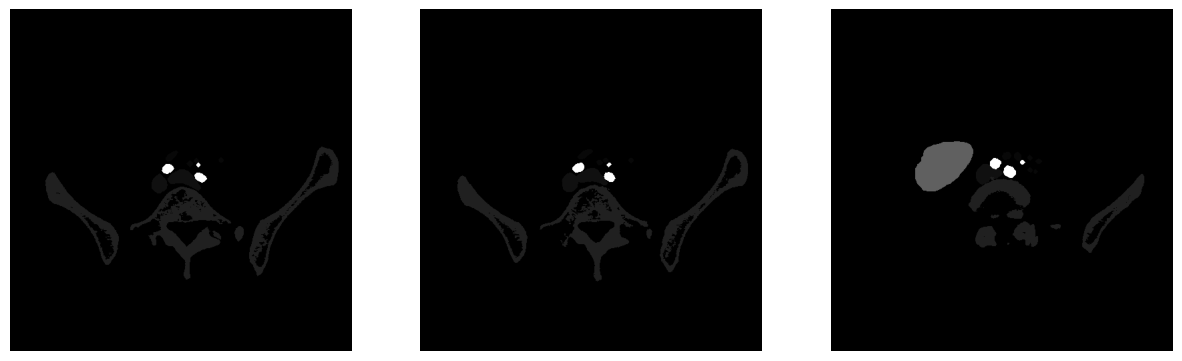

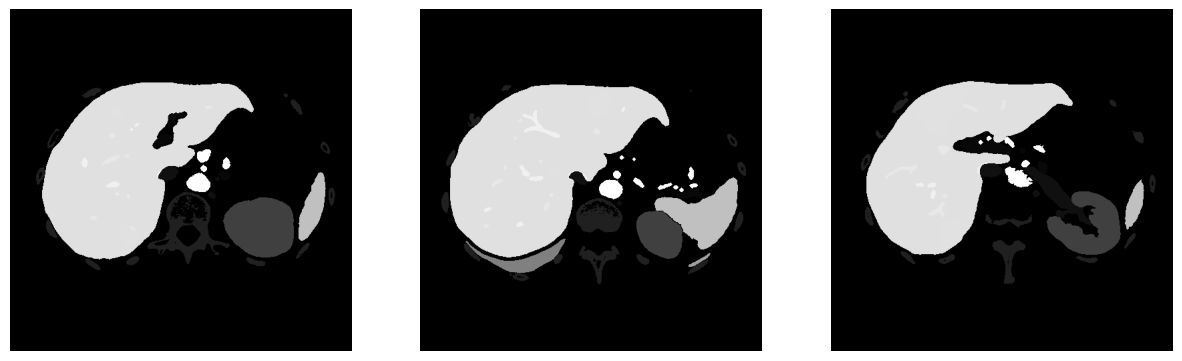

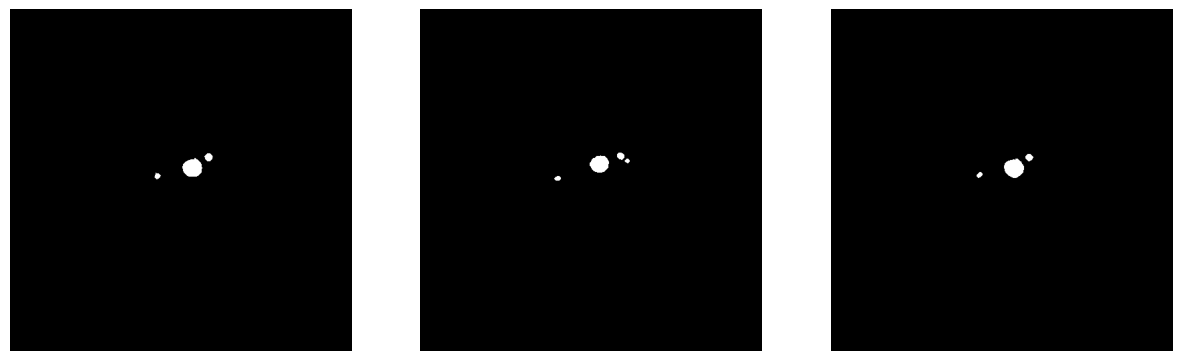

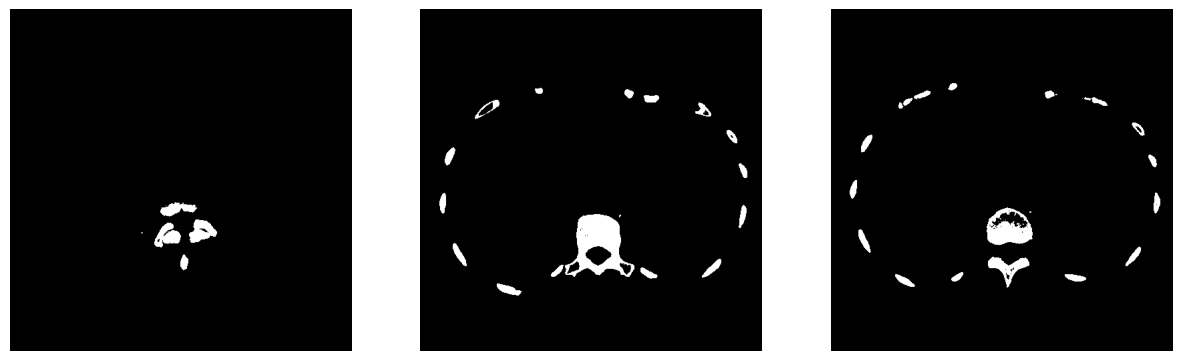

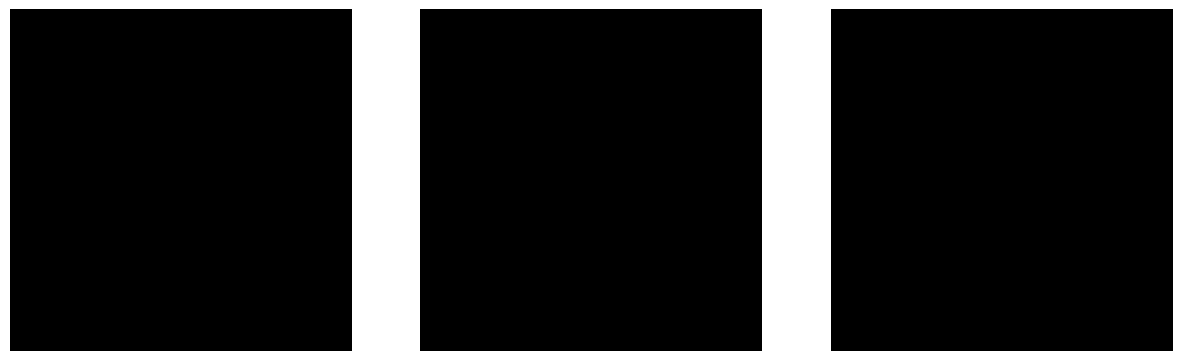

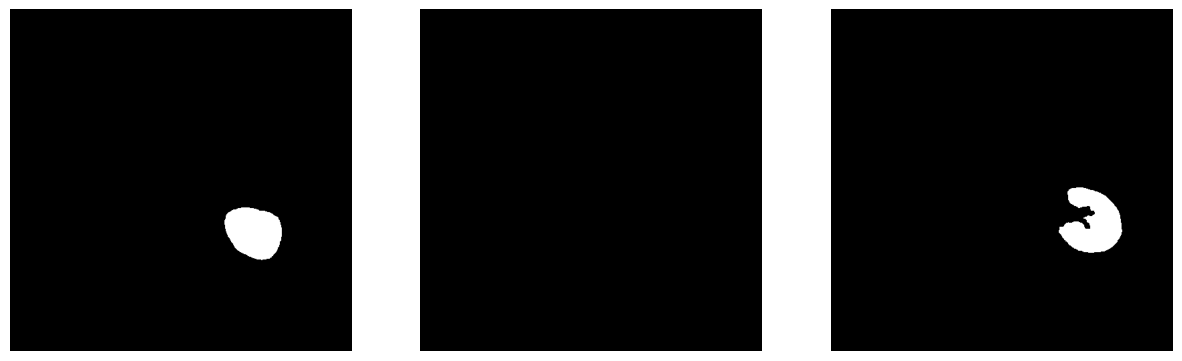

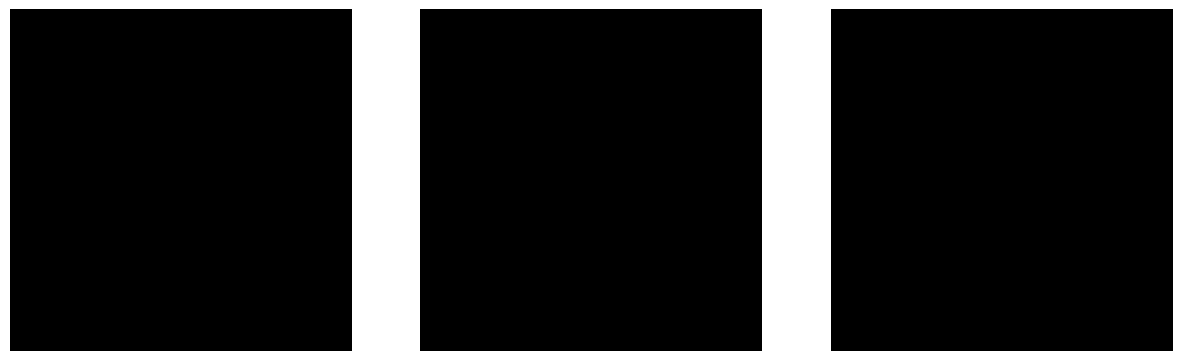

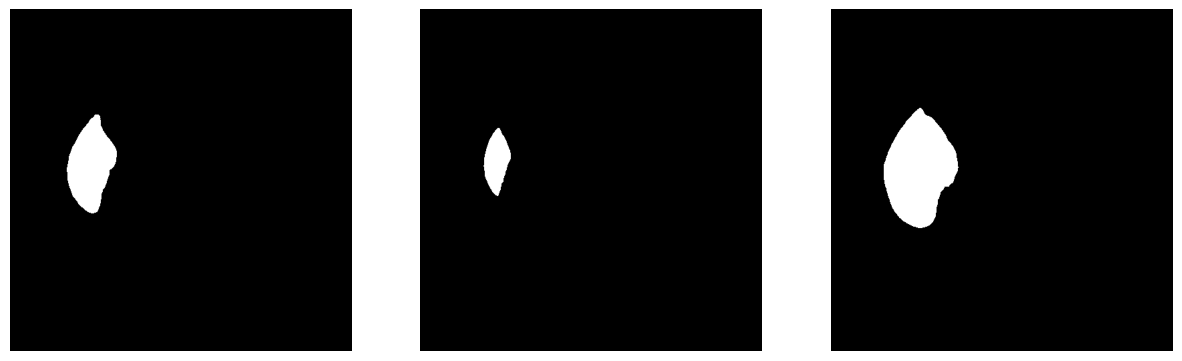

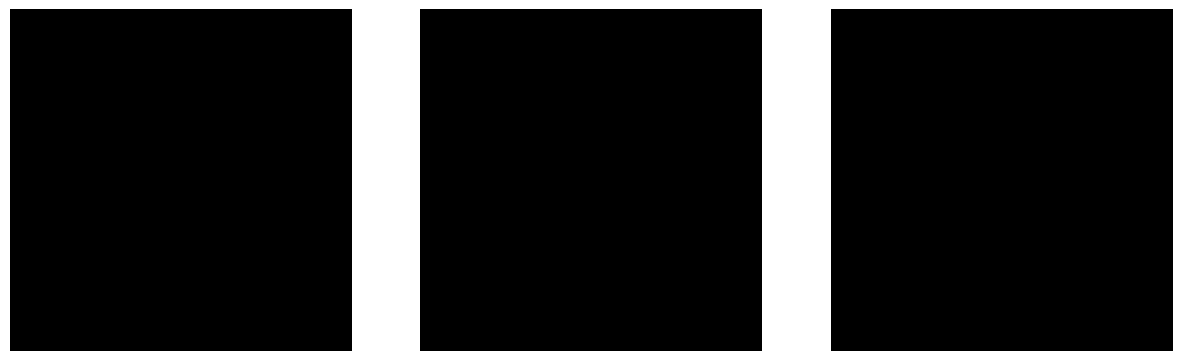

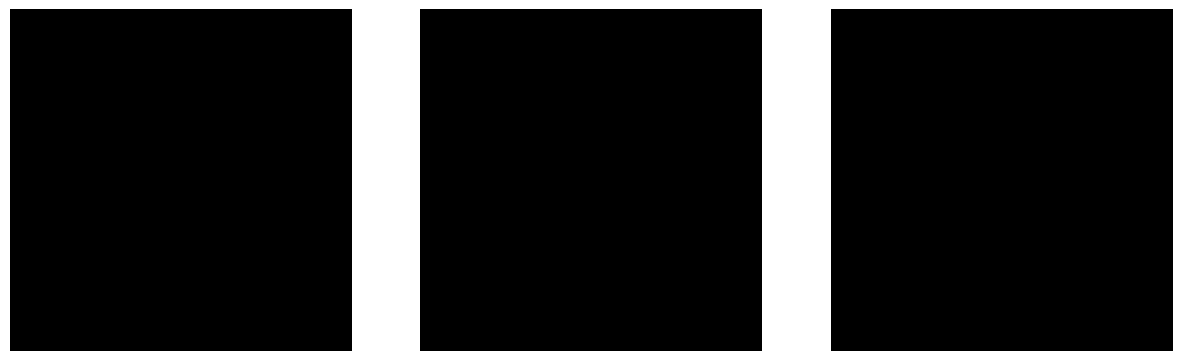

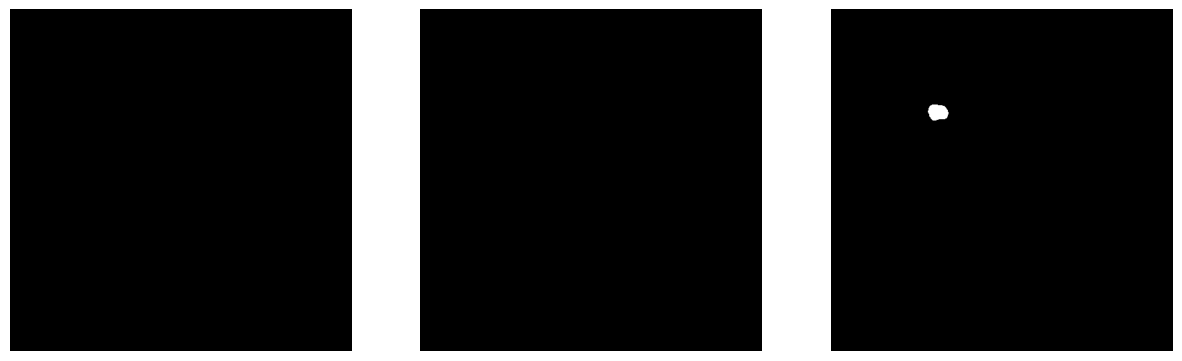

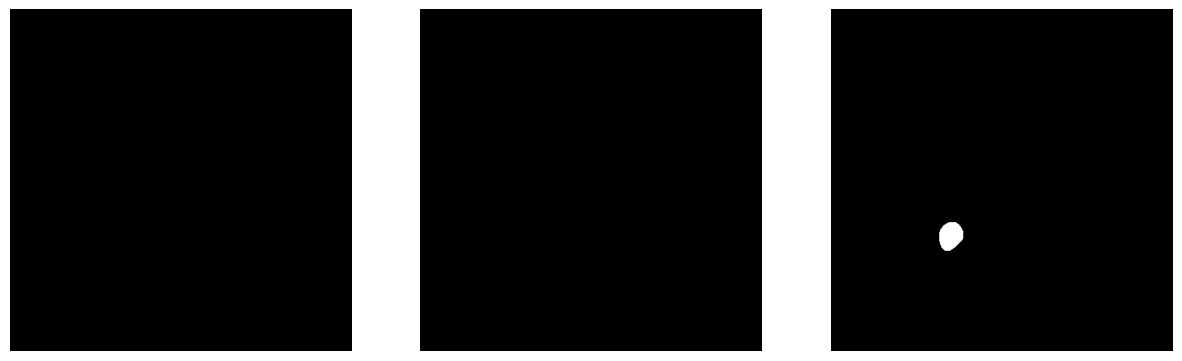

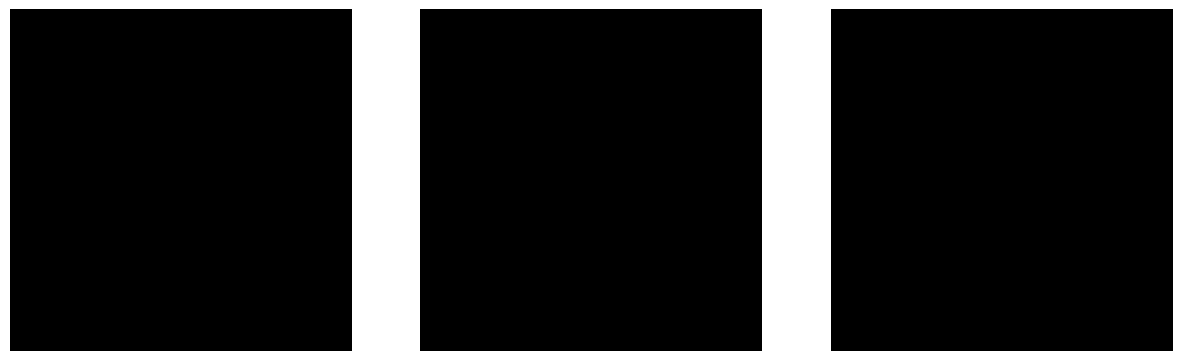

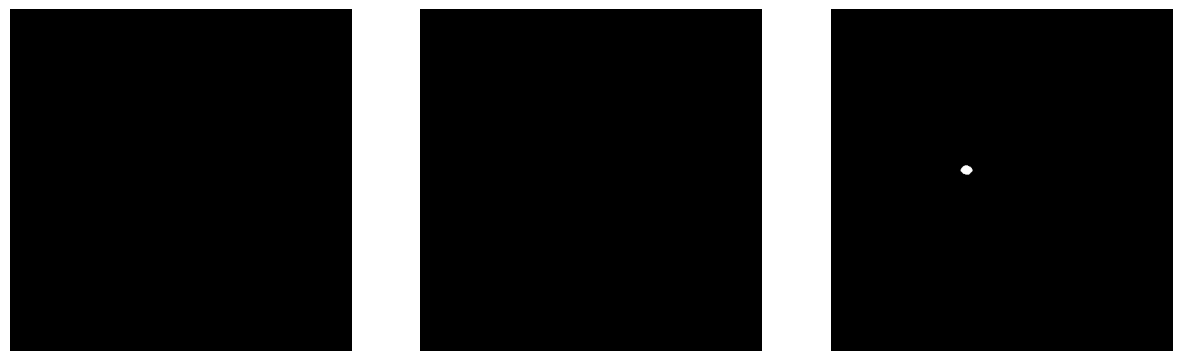

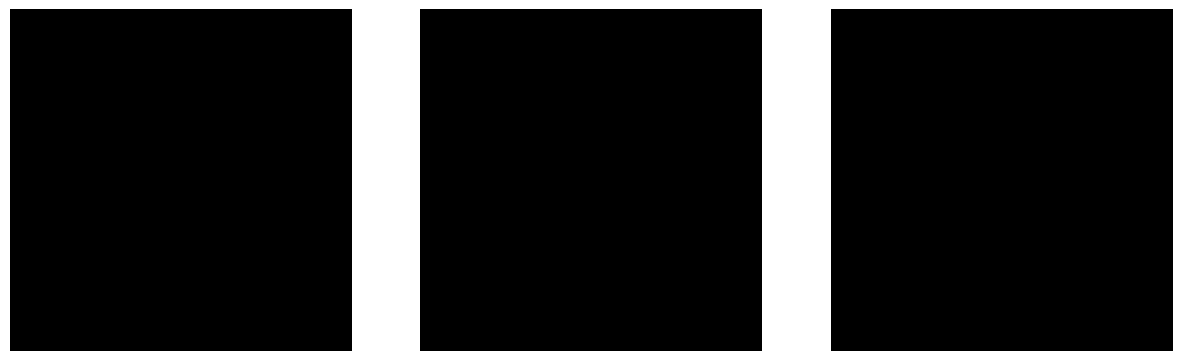

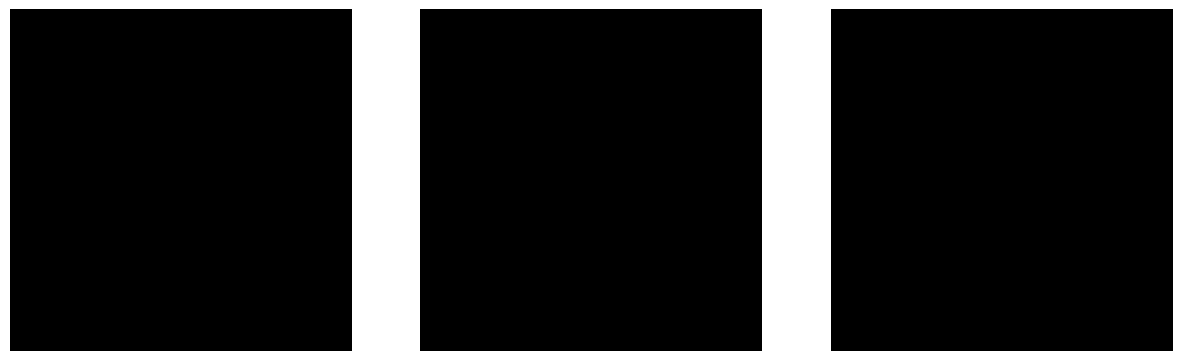

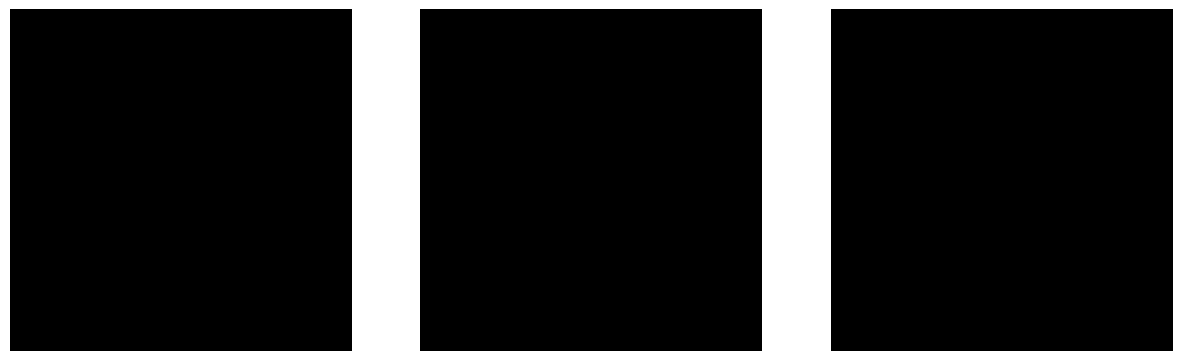

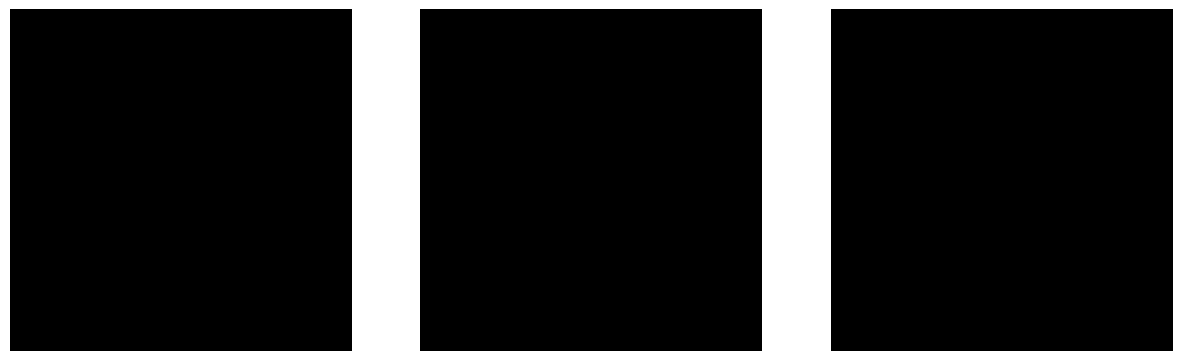

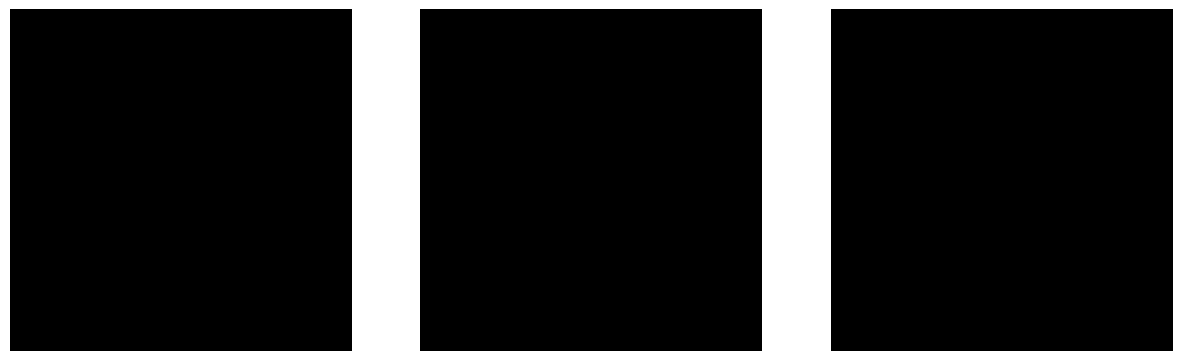

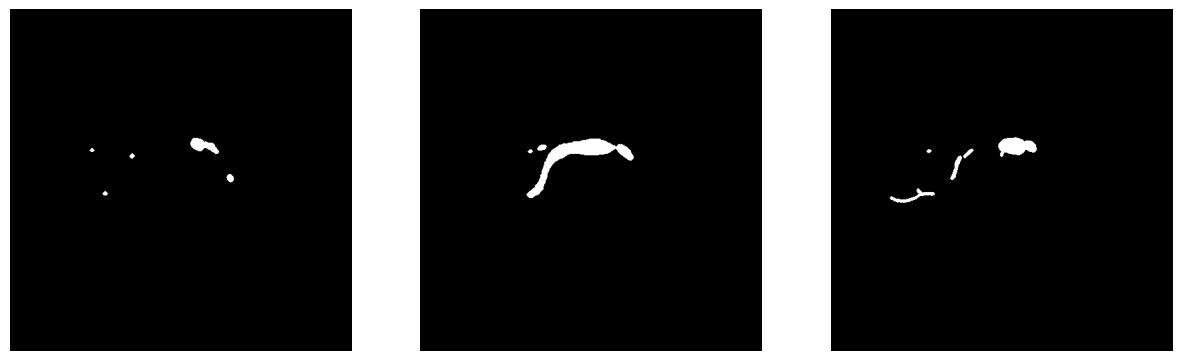

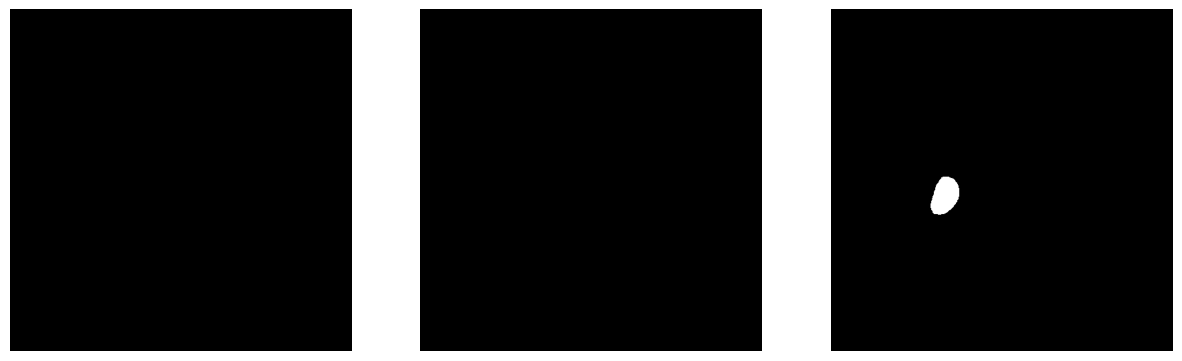

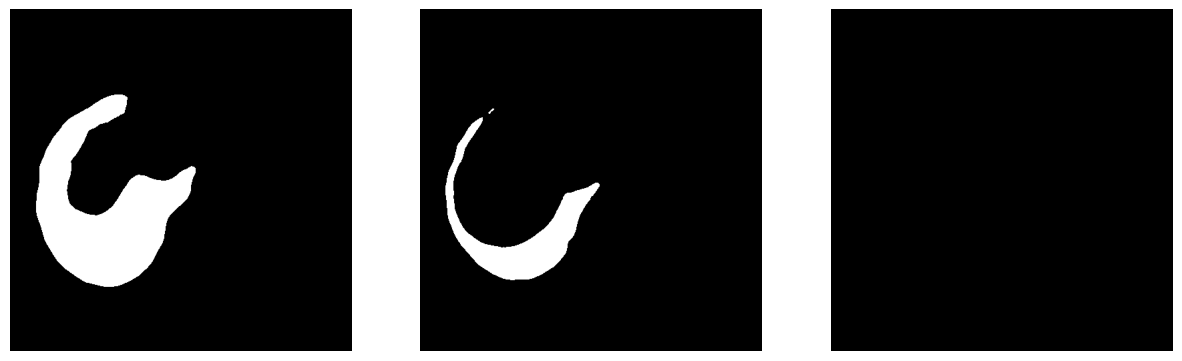

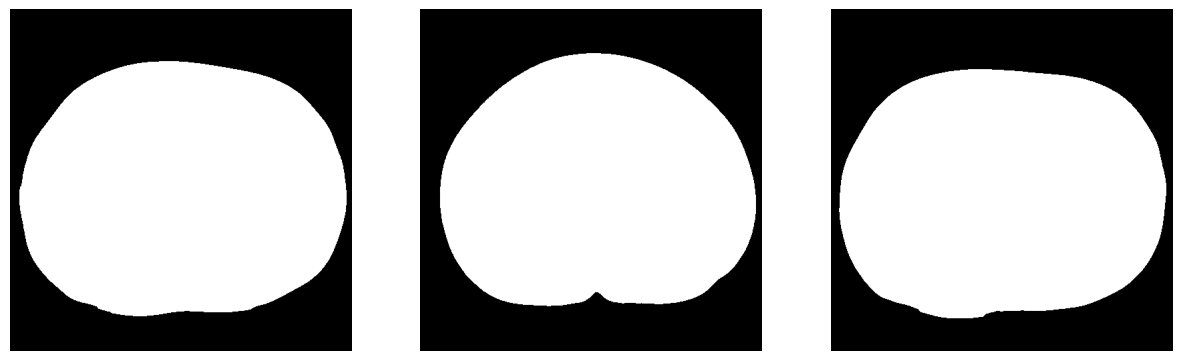

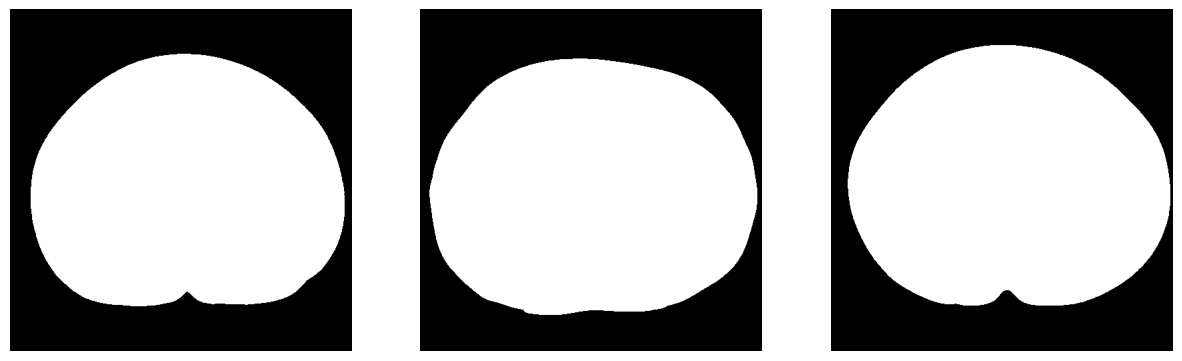

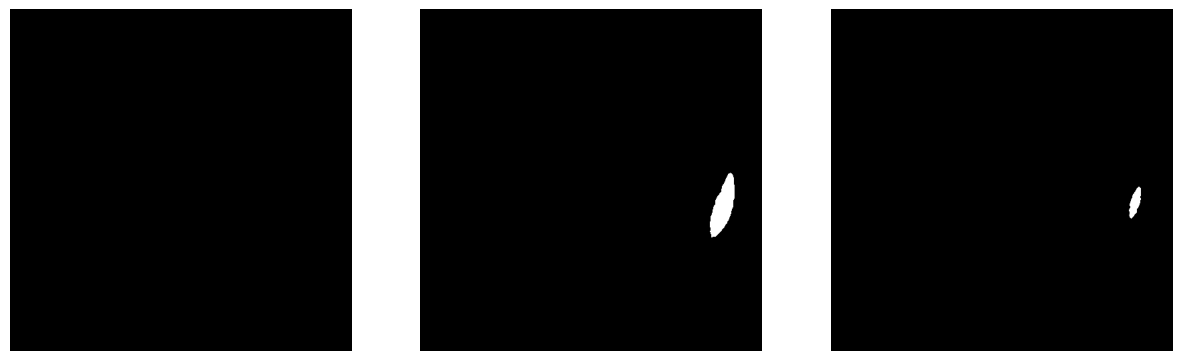

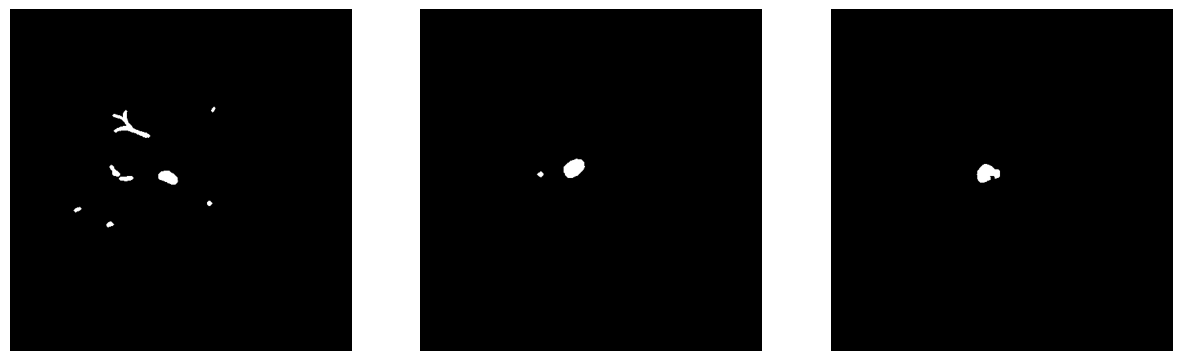

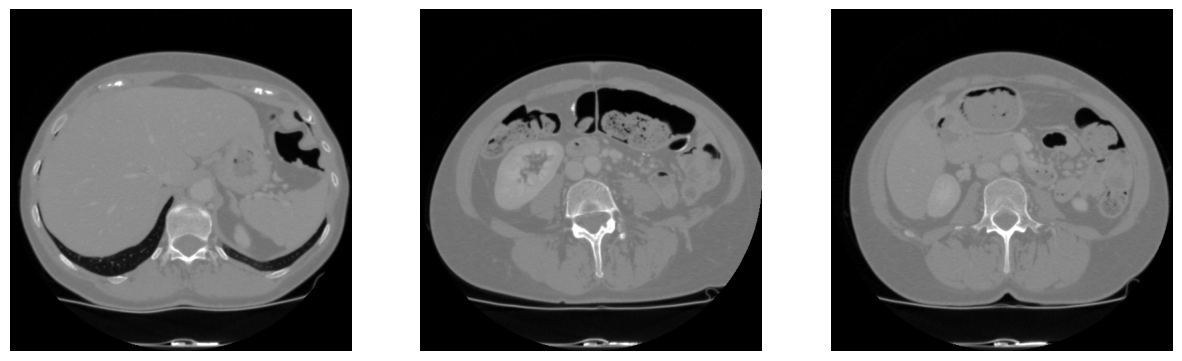

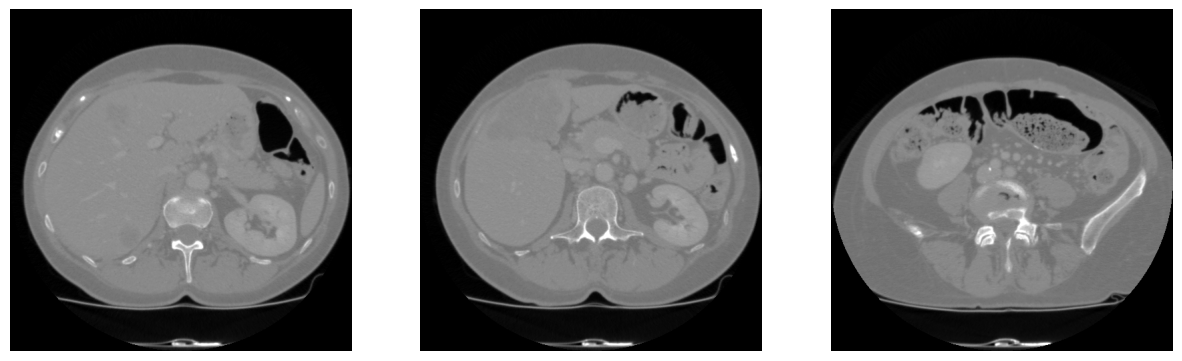

In [ ]:
# Next tast is to find out the total number of Dicom images present in the dataset
# This data needs further slicing
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import zoom

def load_dicom_images_from_folder(folder_path):
    image_paths = []
    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.endswith('.dcm'):  # Finding the images with .dcm extensions
                file_path = os.path.join(root, file)
                image_paths.append(file_path)
    return image_paths

def preprocess_images_in_batches(image_paths, target_size=(512, 512), batch_size=100):  # Since dataset is large I have chosen batch size of 100 to preprocess the images
    for i in range(0, len(image_paths), batch_size):
        batch_paths = image_paths[i:i + batch_size]
        images = []
        for file_path in batch_paths:
            try:
                dicom_data = pydicom.dcmread(file_path)
                img = dicom_data.pixel_array  # getting the pixel array from the image
                zoom_factors = (target_size[0] / img.shape[0], target_size[1] / img.shape[1])
                resized_img = zoom(img, zoom_factors, order=3)  # Using cubic interpolation
                images.append(resized_img)
            except Exception as e:
                print(f"Failed to read or process DICOM file {file_path}: {e}")

        images = np.array(images, dtype=np.float32)
        images = (images - np.min(images)) / (np.max(images) - np.min(images))
        plot_sample_images(images)
# Plotting the sample images
def plot_sample_images(images, num_samples=3):
    if len(images) == 0:
        print("No images to display.")
        return

    plt.figure(figsize=(15, 5))
    for i in range(min(num_samples, len(images))):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.axis('off')
    plt.show()

# Displaying number of images found
dicom_folder = '/content/drive/MyDrive/Colab Notebooks/3Dircadb1'
image_paths = load_dicom_images_from_folder(dicom_folder)
print(f"Found {len(image_paths)} DICOM files.")

preprocess_images_in_batches(image_paths, target_size=(512, 512), batch_size=100)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/deeplabv3_resnet50_coco-cd0a2569.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet50_coco-cd0a2569.pth
100%|██████████| 161M/161M [00:01<00:00, 84.3MB/s]


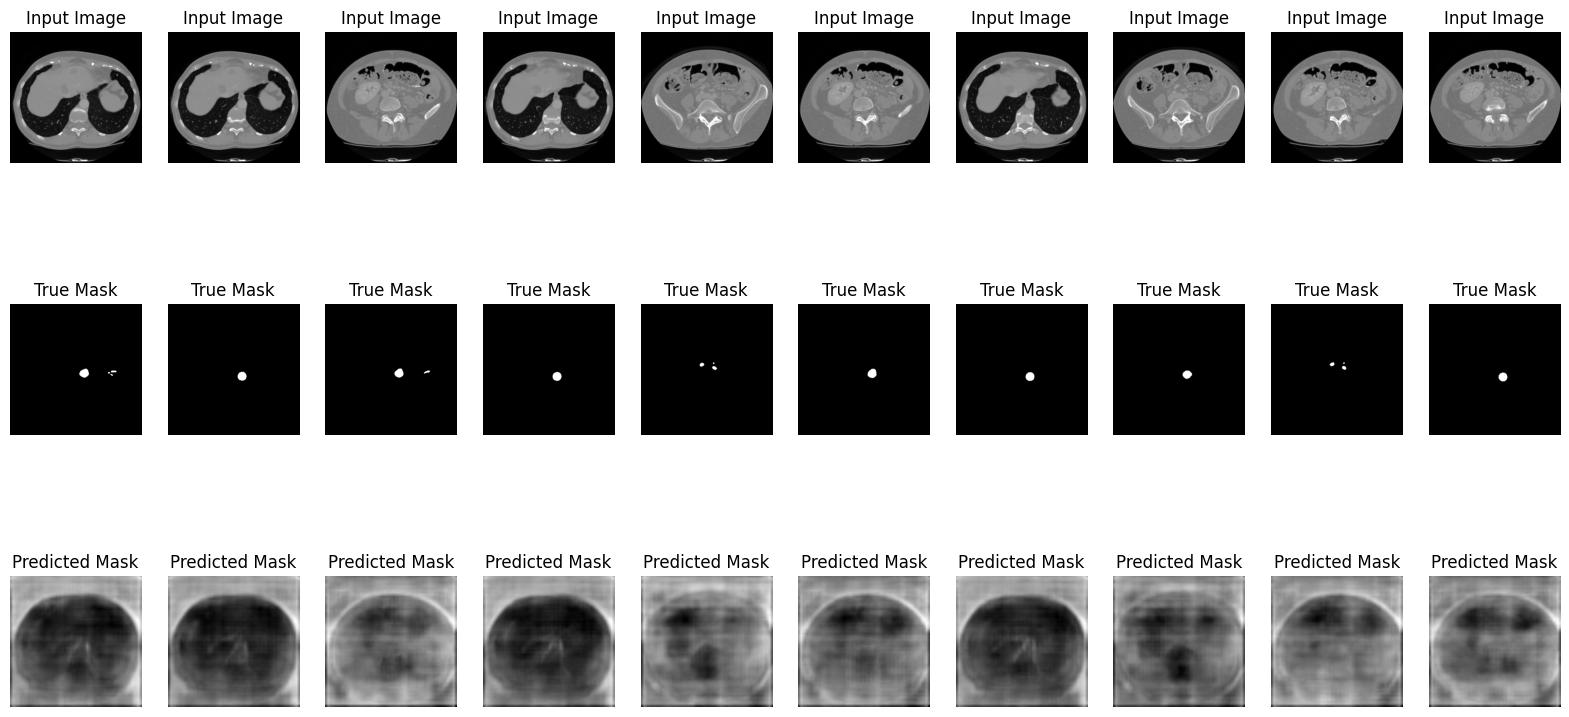

In [ ]:
import os
import pydicom
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import zoom
import torch
import torch.nn as nn
import torchvision.models.segmentation

# Load the pre-trained DeepLabV3+ model
def get_deeplabv3_model(num_classes=1):
    model = torchvision.models.segmentation.deeplabv3_resnet50(pretrained=True)
    model.classifier[4] = nn.Conv2d(256, num_classes, kernel_size=(1, 1), stride=(1, 1))
    model.aux_classifier[4] = nn.Conv2d(256, num_classes, kernel_size=(1, 1), stride=(1, 1))
    return model

model = get_deeplabv3_model()

# Function to load patient DICOM images and masks
def load_dicom_images_and_masks(folder_paths, num_samples=10):
    image_paths = []
    mask_paths = []
    for folder_path in folder_paths:
        for root, _, files in os.walk(folder_path):
            for file in files:
                if file.endswith('.dcm'):
                    file_path = os.path.join(root, file)
                    if 'masks_dicom' in root.lower() or 'labelled_dicom' in root.lower():
                        mask_paths.append(file_path)
                    else:
                        image_paths.append(file_path)
                if len(image_paths) >= num_samples and len(mask_paths) >= num_samples:
                    break
            if len(image_paths) >= num_samples and len(mask_paths) >= num_samples:
                break
        if len(image_paths) >= num_samples and len(mask_paths) >= num_samples:
            break
    return image_paths[:num_samples], mask_paths[:num_samples]

# Function to preprocess images and masks
def preprocess_images_and_masks(image_paths, mask_paths, target_size=(512, 512)):
    images = []
    masks = []
    for image_path, mask_path in zip(image_paths, mask_paths):
        try:
            dicom_data_img = pydicom.dcmread(image_path)
            dicom_data_mask = pydicom.dcmread(mask_path)
            img = dicom_data_img.pixel_array
            mask = dicom_data_mask.pixel_array
            zoom_factors_img = (target_size[0] / img.shape[0], target_size[1] / img.shape[1])
            zoom_factors_mask = (target_size[0] / mask.shape[0], target_size[1] / mask.shape[1])
            resized_img = zoom(img, zoom_factors_img, order=3)  # Using cubic interpolation
            resized_mask = zoom(mask, zoom_factors_mask, order=0)  # Nearest neighbor interpolation for masks
            images.append(resized_img)
            masks.append(resized_mask)
        except Exception as e:
            print(f"Failed to read or process DICOM file {image_path}: {e}")

    if len(images) == 0 or len(masks) == 0:
        raise ValueError("No images or masks to process.")

    images = np.array(images, dtype=np.float32)
    masks = np.array(masks, dtype=np.float32)
    images = (images - np.min(images)) / (np.max(images) - np.min(images))  # Normalize images

    # Convert single-channel images to 3-channel by duplicating the channel
    images = np.repeat(images[:, np.newaxis, :, :], 3, axis=1)

    # Convert images to PyTorch tensors and add batch and channel dimensions
    images = torch.tensor(images)
    masks = torch.tensor(masks).unsqueeze(1)

    return images, masks

# Function to apply the DeepLabV3+ model for segmentation
def segment_images_with_deeplabv3(model, images):
    with torch.no_grad():
        model.eval()
        output = model(images)['out']
        segmented_masks = torch.sigmoid(output).squeeze(1).numpy()
    return segmented_masks

# Function to plot original images, true masks, and segmented masks side by side
def plot_sample_images(images, true_masks, segmented_masks, num_samples=10):
    if len(images) == 0:
        print("No images to display.")
        return

    plt.figure(figsize=(20, 10))
    for i in range(min(num_samples, len(images))):
        plt.subplot(3, num_samples, i + 1)
        plt.imshow(images[i][0], cmap='gray')
        plt.axis('off')
        plt.title('Input Image')

        plt.subplot(3, num_samples, num_samples + i + 1)
        plt.imshow(true_masks[i], cmap='gray')
        plt.axis('off')
        plt.title('True Mask')

        plt.subplot(3, num_samples, 2 * num_samples + i + 1)
        plt.imshow(segmented_masks[i], cmap='gray')
        plt.axis('off')
        plt.title('Predicted Mask')
    plt.show()

# Example usage
extracted_folder = '/content/drive/MyDrive/Colab Notebooks/3Dircadb1'
patient_dicom_folder = os.path.join(extracted_folder, '3Dircadb1.1/PATIENT_DICOM')
mask_dicom_folder = os.path.join(extracted_folder, '3Dircadb1.1/MASKS_DICOM')
image_paths, mask_paths = load_dicom_images_and_masks([patient_dicom_folder, mask_dicom_folder], num_samples=20)

if image_paths and mask_paths:
    images, true_masks = preprocess_images_and_masks(image_paths, mask_paths, target_size=(512, 512))
    segmented_masks = segment_images_with_deeplabv3(model, images)

    plot_sample_images(images.squeeze(1).numpy(), true_masks.squeeze(1).numpy(), segmented_masks, num_samples=10)
else:
    print("No valid patient DICOM images or masks found.")

Epoch 1/10
2/2 [==============================] - 497s 262s/step - loss: 0.6677 - accuracy: 0.8473 - val_loss: 0.5840 - val_accuracy: 0.9968
Epoch 2/10
2/2 [==============================] - 470s 250s/step - loss: 0.5054 - accuracy: 0.9968 - val_loss: 0.1251 - val_accuracy: 0.9968
Epoch 3/10
2/2 [==============================] - 481s 263s/step - loss: 0.1631 - accuracy: 0.9968 - val_loss: 0.1156 - val_accuracy: 0.9968
Epoch 4/10
2/2 [==============================] - 479s 261s/step - loss: 0.1134 - accuracy: 0.9968 - val_loss: 0.0909 - val_accuracy: 0.9968
Epoch 5/10
2/2 [==============================] - 480s 261s/step - loss: 0.0794 - accuracy: 0.9968 - val_loss: 0.0767 - val_accuracy: 0.9968
Epoch 6/10
2/2 [==============================] - 478s 259s/step - loss: 0.0694 - accuracy: 0.9968 - val_loss: 0.0493 - val_accuracy: 0.9968
Epoch 7/10
2/2 [==============================] - 470s 251s/step - loss: 0.0443 - accuracy: 0.9968 - val_loss: 0.0382 - val_accuracy: 0.9968
Epoch 8/10
2/

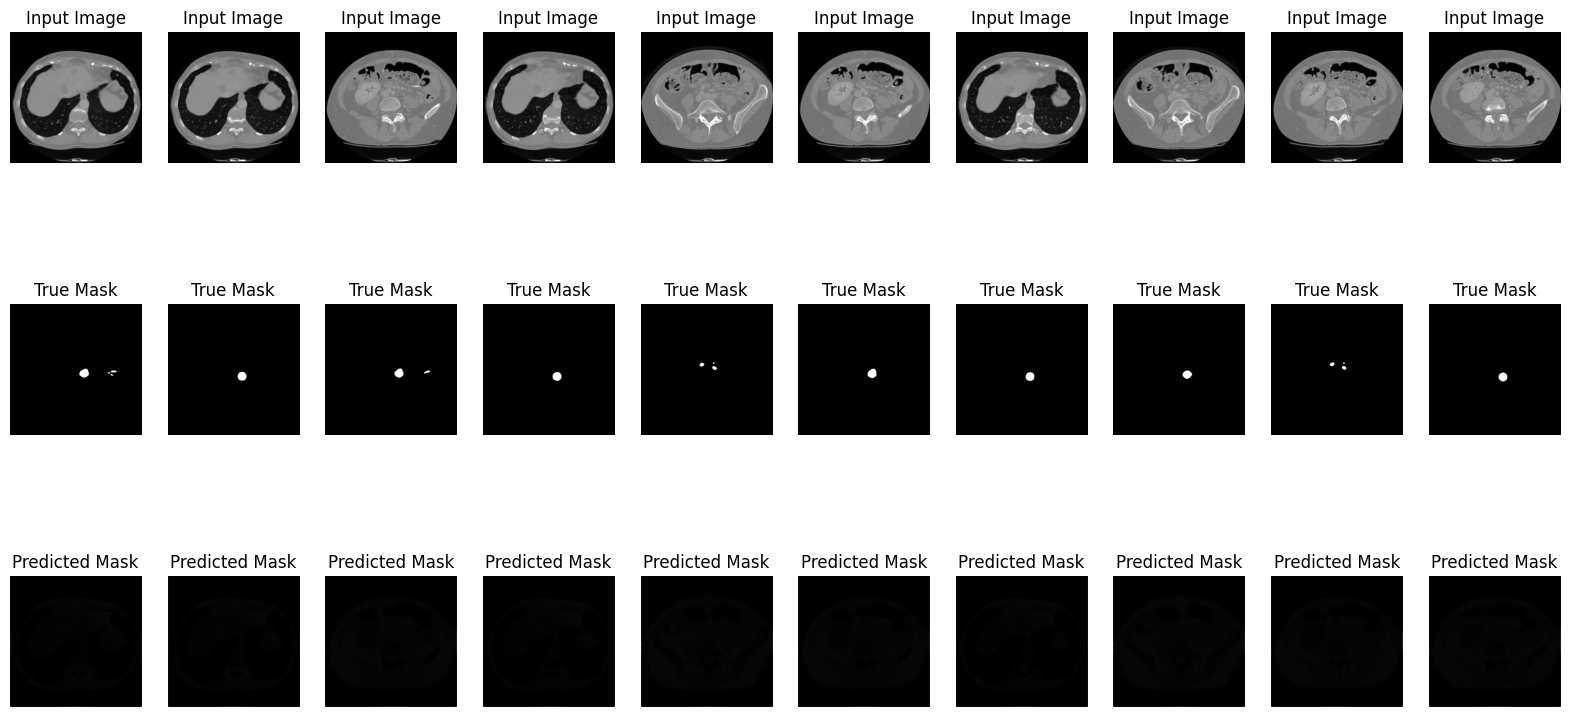

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import zoom
import pydicom
import tensorflow as tf
from tensorflow.keras import layers, models

# Load DICOM images and masks
def load_dicom_images_and_masks(folder_paths, num_samples=10):
    image_paths = []
    mask_paths = []
    for folder_path in folder_paths:
        for root, _, files in os.walk(folder_path):
            for file in files:
                if file.endswith('.dcm'):
                    file_path = os.path.join(root, file)
                    if 'MASKS_DICOM' in root or 'LABELLED_DICOM' in root:
                        mask_paths.append(file_path)
                    else:
                        image_paths.append(file_path)
                if len(image_paths) >= num_samples and len(mask_paths) >= num_samples:
                    break
            if len(image_paths) >= num_samples and len(mask_paths) >= num_samples:
                break
        if len(image_paths) >= num_samples and len(mask_paths) >= num_samples:
            break
    return image_paths[:num_samples], mask_paths[:num_samples]

# Preprocess images and masks
def preprocess_images_and_masks(image_paths, mask_paths, target_size=(512, 512)):
    images = []
    masks = []
    for image_path, mask_path in zip(image_paths, mask_paths):
        try:
            dicom_data_img = pydicom.dcmread(image_path)
            dicom_data_mask = pydicom.dcmread(mask_path)
            img = dicom_data_img.pixel_array
            mask = dicom_data_mask.pixel_array
            zoom_factors_img = (target_size[0] / img.shape[0], target_size[1] / img.shape[1])
            zoom_factors_mask = (target_size[0] / mask.shape[0], target_size[1] / mask.shape[1])
            resized_img = zoom(img, zoom_factors_img, order=3)  # Cubic interpolation
            resized_mask = zoom(mask, zoom_factors_mask, order=0)  # Nearest neighbor interpolation
            images.append(resized_img)
            masks.append(resized_mask)
        except Exception as e:
            print(f"Failed to read or process DICOM file {image_path}: {e}")

    if len(images) == 0 or len(masks) == 0:
        raise ValueError("No images or masks to process.")

    images = np.array(images, dtype=np.float32)
    masks = np.array(masks, dtype=np.float32)
    images = (images - np.min(images)) / (np.max(images) - np.min(images))  # Normalize images
    masks = (masks > 0).astype(np.float32)  # Binary masks

    images = np.expand_dims(images, axis=-1)  # Add channel dimension
    masks = np.expand_dims(masks, axis=-1)

    return images, masks

# Build U-Net model
def unet_model(input_size=(512, 512, 1)):
    inputs = layers.Input(input_size)
    # Encoder
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    p4 = layers.MaxPooling2D((2, 2))(c4)

    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)

    # Decoder
    u6 = layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c4])
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c6)

    u7 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c3])
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c7)

    u8 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = layers.concatenate([u8, c2])
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c8)

    u9 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = layers.concatenate([u9, c1])
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c9)

    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = models.Model(inputs=[inputs], outputs=[outputs])
    return model

# Compile and train the model
def train_unet_model(images, masks):
    model = unet_model()
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(images, masks, epochs=10, batch_size=8, validation_split=0.2)
    return model

# Plot sample images
def plot_sample_images(images, true_masks, predicted_masks, num_samples=10):
    if len(images) == 0:
        print("No images to display.")
        return

    plt.figure(figsize=(20, 10))
    for i in range(min(num_samples, len(images))):
        plt.subplot(3, num_samples, i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        plt.axis('off')
        plt.title('Input Image')

        plt.subplot(3, num_samples, num_samples + i + 1)
        plt.imshow(true_masks[i].squeeze(), cmap='gray')
        plt.axis('off')
        plt.title('True Mask')

        plt.subplot(3, num_samples, 2 * num_samples + i + 1)
        plt.imshow(predicted_masks[i].squeeze(), cmap='gray')
        plt.axis('off')
        plt.title('Predicted Mask')
    plt.show()

# Main code
extracted_folder = '/content/drive/MyDrive/Colab Notebooks/3Dircadb1'
patient_dicom_folder = os.path.join(extracted_folder, '3Dircadb1.1/PATIENT_DICOM')
mask_dicom_folder = os.path.join(extracted_folder, '3Dircadb1.1/MASKS_DICOM')
image_paths, mask_paths = load_dicom_images_and_masks([patient_dicom_folder, mask_dicom_folder], num_samples=20)

if image_paths and mask_paths:
    images, true_masks = preprocess_images_and_masks(image_paths, mask_paths, target_size=(512, 512))
    model = train_unet_model(images, true_masks)
    predicted_masks = model.predict(images)

    plot_sample_images(images, true_masks, predicted_masks, num_samples=10)
else:
    print("No valid patient DICOM images or masks found.")

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import zoom
import pydicom
import tensorflow as tf
from tensorflow.keras import layers, models

# Load DICOM images and masks
def load_dicom_images_and_masks(folder_paths, num_samples=10):
    image_paths = []
    mask_paths = []
    for folder_path in folder_paths:
        for root, _, files in os.walk(folder_path):
            for file in files:
                if file.endswith('.dcm'):
                    file_path = os.path.join(root, file)
                    if 'MASKS_DICOM' in root or 'LABELLED_DICOM' in root:
                        mask_paths.append(file_path)
                    else:
                        image_paths.append(file_path)
                if len(image_paths) >= num_samples and len(mask_paths) >= num_samples:
                    break
            if len(image_paths) >= num_samples and len(mask_paths) >= num_samples:
                break
        if len(image_paths) >= num_samples and len(mask_paths) >= num_samples:
            break
    return image_paths[:num_samples], mask_paths[:num_samples]

# Preprocess images and masks
def preprocess_images_and_masks(image_paths, mask_paths, target_size=(512, 512)):
    images = []
    masks = []
    for image_path, mask_path in zip(image_paths, mask_paths):
        try:
            dicom_data_img = pydicom.dcmread(image_path)
            dicom_data_mask = pydicom.dcmread(mask_path)
            img = dicom_data_img.pixel_array
            mask = dicom_data_mask.pixel_array
            zoom_factors_img = (target_size[0] / img.shape[0], target_size[1] / img.shape[1])
            zoom_factors_mask = (target_size[0] / mask.shape[0], target_size[1] / mask.shape[1])
            resized_img = zoom(img, zoom_factors_img, order=3)  # Cubic interpolation
            resized_mask = zoom(mask, zoom_factors_mask, order=0)  # Nearest neighbor interpolation
            images.append(resized_img)
            masks.append(resized_mask)
        except Exception as e:
            print(f"Failed to read or process DICOM file {image_path}: {e}")

    if len(images) == 0 or len(masks) == 0:
        raise ValueError("No images or masks to process.")

    images = np.array(images, dtype=np.float32)
    masks = np.array(masks, dtype=np.float32)
    images = (images - np.min(images)) / (np.max(images) - np.min(images))  # Normalize images
    masks = (masks > 0).astype(np.float32)  # Binary masks

    images = np.expand_dims(images, axis=-1)  # Add channel dimension
    masks = np.expand_dims(masks, axis=-1)

    return images, masks

# Build U-Net model
def unet_model(input_size=(512, 512, 1)):
    inputs = layers.Input(input_size)
    # Encoder
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    p4 = layers.MaxPooling2D((2, 2))(c4)

    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)

    # Decoder
    u6 = layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c4])
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c6)

    u7 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c3])
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c7)

    u8 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = layers.concatenate([u8, c2])
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c8)

    u9 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = layers.concatenate([u9, c1])
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c9)

    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = models.Model(inputs=[inputs], outputs=[outputs])
    return model

# Compile and train the model
def train_unet_model(images, masks):
    model = unet_model()
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(images, masks, epochs=10, batch_size=8, validation_split=0.2)
    return model

# Plot sample images with overlayed predicted masks
def plot_sample_images(images, true_masks, predicted_masks, num_samples=10):
    if len(images) == 0:
        print("No images to display.")
        return

    plt.figure(figsize=(20, 10))
    for i in range(min(num_samples, len(images))):
        plt.subplot(3, num_samples, i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        plt.axis('off')
        plt.title('Input Image')

        plt.subplot(3, num_samples, num_samples + i + 1)
        plt.imshow(true_masks[i].squeeze(), cmap='gray')
        plt.axis('off')
        plt.title('True Mask')

        plt.subplot(3, num_samples, 2 * num_samples + i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        plt.imshow(predicted_masks[i].squeeze(), cmap='jet', alpha=0.5)
        plt.axis('off')
        plt.title('Predicted Mask')
    plt.show()

# Main code
extracted_folder = '/content/drive/MyDrive/Colab Notebooks/3Dircadb1'
patient_dicom_folder = os.path.join(extracted_folder, '3Dircadb1.1/PATIENT_DICOM')
mask_dicom_folder = os.path.join(extracted_folder, '3Dircadb1.1/MASKS_DICOM')

image_paths, mask_paths = load_dicom_images_and_masks([patient_dicom_folder, mask_dicom_folder], num_samples=20)

if image_paths and mask_paths:
    images, true_masks = preprocess_images_and_masks(image_paths, mask_paths, target_size=(512, 512))
    model = train_unet_model(images, true_masks)
    predicted_masks = model.predict(images)

    plot_sample_images(images, true_masks, predicted_masks, num_samples=10)
else:
    print("No valid patient DICOM images or masks found.")

Epoch 1/10
2/2 [==============================] - 479s 252s/step - loss: 0.6678 - accuracy: 0.9872 - val_loss: 0.5485 - val_accuracy: 0.9968
Epoch 2/10
2/2 [==============================] - 473s 255s/step - loss: 0.3722 - accuracy: 0.9968 - val_loss: 1.7336 - val_accuracy: 0.9968
Epoch 3/10
2/2 [==============================] - 477s 260s/step - loss: 0.8476 - accuracy: 0.9968 - val_loss: 0.1947 - val_accuracy: 0.9968
Epoch 4/10
2/2 [==============================] - 480s 261s/step - loss: 0.2257 - accuracy: 0.9968 - val_loss: 0.2823 - val_accuracy: 0.9968
Epoch 5/10
2/2 [==============================] - 478s 261s/step - loss: 0.2700 - accuracy: 0.9968 - val_loss: 0.2079 - val_accuracy: 0.9968
Epoch 6/10
2/2 [==============================] - 480s 261s/step - loss: 0.1602 - accuracy: 0.9968 - val_loss: 0.0419 - val_accuracy: 0.9968
Epoch 7/10
2/2 [==============================] - 477s 259s/step - loss: 0.0729 - accuracy: 0.9968 - val_loss: 0.0545 - val_accuracy: 0.9968
Epoch 8/10
1/

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import zoom
import pydicom
import tensorflow as tf
from tensorflow.keras import layers, models, Input, Model
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose, concatenate


# Load DICOM images and masks
def load_liver_dicom_images_and_masks(folder_paths, num_samples=10):
    image_paths = []
    mask_paths = []
    for folder_path in folder_paths:
        for root, _, files in os.walk(folder_path):
            for file in files:
                if file.endswith('.dcm') or 'liver' in file.lower():  # Filter for liver images
                    file_path = os.path.join(root, file)
                    if 'MASKS_DICOM' in root or 'LABELLED_DICOM' in root:
                        mask_paths.append(file_path)
                    else:
                        image_paths.append(file_path)
                if len(image_paths) >= num_samples and len(mask_paths) >= num_samples:
                    break
            if len(image_paths) >= num_samples and len(mask_paths) >= num_samples:
                break
        if len(image_paths) >= num_samples and len(mask_paths) >= num_samples:
            break
    return image_paths[:num_samples], mask_paths[:num_samples]

# Preprocess images and masks
def preprocess_images_and_masks(image_paths, mask_paths, target_size=(512, 512)):
    images = []
    masks = []
    for image_path, mask_path in zip(image_paths, mask_paths):
        try:
            dicom_data_img = pydicom.dcmread(image_path)
            dicom_data_mask = pydicom.dcmread(mask_path)
            img = dicom_data_img.pixel_array
            mask = dicom_data_mask.pixel_array
            zoom_factors_img = (target_size[0] / img.shape[0], target_size[1] / img.shape[1])
            zoom_factors_mask = (target_size[0] / mask.shape[0], target_size[1] / mask.shape[1])
            resized_img = zoom(img, zoom_factors_img, order=3)  # Cubic interpolation
            resized_mask = zoom(mask, zoom_factors_mask, order=0)  # Nearest neighbor interpolation
            images.append(resized_img)
            masks.append(resized_mask)
        except Exception as e:
            print(f"Failed to read or process DICOM file {image_path}: {e}")

    if len(images) == 0 or len(masks) == 0:
        raise ValueError("No images or masks to process.")

    images = np.array(images, dtype=np.float32)
    masks = np.array(masks, dtype=np.float32)
    images = (images - np.min(images)) / (np.max(images) - np.min(images))  # Normalize images
    masks = (masks > 0).astype(np.float32)  # Binary masks

    images = np.expand_dims(images, axis=-1)  # Add channel dimension
    masks = np.expand_dims(masks, axis=-1)

    return images, masks

# Build U-Net model
def unet_model(input_size=(512, 512, 1)):
    inputs = Input(input_size)

    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)

    up6 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=3)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)

    up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)

    up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)

    up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)

    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

    return models.Model(inputs=[inputs], outputs=[conv10])

# Compile and train the model
def train_unet_model(images, masks):
    model = unet_model()
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(images, masks, epochs=10, batch_size=8, validation_split=0.2)
    return model

# Plot sample images
def plot_sample_images(images, true_masks, predicted_masks, num_samples=10):
    if len(images) == 0:
        print("No images to display.")
        return

    plt.figure(figsize=(20, 10))
    for i in range(min(num_samples, len(images))):
        plt.subplot(3, num_samples, i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        plt.axis('off')
        plt.title('Input Image')

        plt.subplot(3, num_samples, num_samples + i + 1)
        plt.imshow(true_masks[i].squeeze(), cmap='gray')
        plt.axis('off')
        plt.title('True Mask')

        plt.subplot(3, num_samples, 2 * num_samples + i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        plt.imshow(predicted_masks[i].squeeze(), cmap='Reds', alpha=0.5)  # Overlay predicted mask
        plt.axis('off')
        plt.title('Predicted Mask')
    plt.show()

# Main code
extracted_folder = '/content/drive/MyDrive/Colab Notebooks/3Dircadb1'  # Adjust this path
patient_dicom_folder = os.path.join(extracted_folder, '3Dircadb1.1/PATIENT_DICOM')
mask_dicom_folder = os.path.join(extracted_folder, '3Dircadb1.1/MASKS_DICOM')
image_paths, mask_paths = load_liver_dicom_images_and_masks([patient_dicom_folder, mask_dicom_folder], num_samples=20)

if image_paths and mask_paths:
    images, true_masks = preprocess_images_and_masks(image_paths, mask_paths, target_size=(512, 512))
    model = train_unet_model(images, true_masks)
    predicted_masks = model.predict(images)

    plot_sample_images(images, true_masks, predicted_masks, num_samples=3)
else:
    print("No valid liver DICOM images or masks found.")




In [1]:
!pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.1 MB/s eta 0:00:00


In [2]:
!pip install segment-anything

In [3]:
!git clone https://github.com/OpenGVLab/SAM-Med2D.git SAM_Med2D
import torch
import torchvision
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())
import sys
!{sys.executable} -m pip install opencv-python matplotlib
# !{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'

# !mkdir images
# !wget -P images https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/dog.jpg



Cloning into 'SAM_Med2D'...
remote: Enumerating objects: 350, done.
remote: Counting objects: 100% (119/119), done.
remote: Compressing objects: 100% (106/106), done.
remote: Total 350 (delta 69), reused 35 (delta 13), pack-reused 231
Receiving objects: 100% (350/350), 30.23 MiB | 17.40 MiB/s, done.
Resolving deltas: 100% (158/158), done.
PyTorch version: 2.3.0+cu121
Torchvision version: 0.18.0+cu121
CUDA is available: False


In [4]:
# Step 4: Clone SAM-Med2D repository and install dependencies
!git clone https://github.com/OpenGVLab/SAM-Med2D.git SAM_Med2D

# Check PyTorch and torchvision versions
import os
import torch
import torchvision
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())

!pip install opencv-python matplotlib

# Step 5: Download the SAM-Med2D model weights
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

ROOT_DIR = '.'
CODE_DIR = f"{ROOT_DIR}/SAM_Med2D"
MODEL_DIR = f"{CODE_DIR}/pretrain_model"
os.makedirs(f'{MODEL_DIR}', exist_ok=True)

class Downloader(object):
  def __init__(self, use_pydrive, save_dir='.'):
    self.use_pydrive = use_pydrive
    self.save_dir = save_dir
    if self.use_pydrive:
      self.authenticate()

  def authenticate(self):
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    self.drive = GoogleDrive(gauth)

  def download_file(self, file_id, file_name):
    file_dst = f'{self.save_dir}/{file_name}'
    if os.path.exists(file_dst):
      print(f'{file_name} already exists')
      return
    downloaded = self.drive.CreateFile({'id': file_id})
    downloaded.FetchMetadata(fetch_all=True)
    downloaded.GetContentFile(file_dst)

downloader = Downloader(True, MODEL_DIR)

sam_med2d_model = {'id': '1ARiB5RkSsWmAB_8mqWnwDF8ZKTtFwsjl', 'name': 'sam-med2d_b.pth'}
downloader.download_file(file_id=sam_med2d_model['id'], file_name=sam_med2d_model['name'])

# Step 6: Load SAM-med2d model and perform segmentation
import sys
sys.path.append(ROOT_DIR) # Make sure the import SAM_Med2D.segment_anything works

from SAM_Med2D.segment_anything import sam_model_registry
from SAM_Med2D.segment_anything.predictor_sammed import SammedPredictor
from argparse import Namespace

args = Namespace()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
args.image_size = 256
args.encoder_adapter = True
args.sam_checkpoint = f"{MODEL_DIR}/sam-med2d_b.pth"
model = sam_model_registry["vit_b"](args).to(device)
predictor = SammedPredictor(model)



fatal: destination path 'SAM_Med2D' already exists and is not an empty directory.
PyTorch version: 2.3.0+cu121
Torchvision version: 0.18.0+cu121
CUDA is available: False


True
*******load ./SAM_Med2D/pretrain_model/sam-med2d_b.pth


In [10]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
from torchvision.transforms import Resize, Normalize
from skimage.measure import label, regionprops, find_contours
from sklearn.metrics import jaccard_score
import os
from copy import deepcopy

# Function to load DICOM file
def load_dicom_image(file_path):
    dicom = pydicom.dcmread(file_path)
    image = dicom.pixel_array
    return image

# Function to preprocess the image
def preprocess_image(image, target_size):
    # Normalize the image
    image = image / 255.0

    # Convert to 3-channel format
    image = np.stack([image] * 3, axis=-1)

    # Resize the image
    image = Resize((target_size, target_size))(torch.tensor(image).permute(2, 0, 1).unsqueeze(0)).squeeze(0)

    # Normalize the image with the mean and std of ImageNet
    normalize = Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    image = normalize(image)

    return image

# Function to compute Dice score
def dice_score(pred, true):
    intersection = np.sum(pred * true)
    return 2.0 * intersection / (np.sum(pred) + np.sum(true))

# Function to compute Jaccard index
def jaccard_index(pred, true):
    return jaccard_score(true.flatten(), pred.flatten())

# Function to find polygonal contour of the liver
def find_polygonal_contour(mask):
    contours = find_contours(mask, 0.5)
    if len(contours) == 0:
        return None
    # Assuming the liver is the largest contour
    liver_contour = max(contours, key=lambda x: len(x))
    return liver_contour

# Load original image and mask
original_image_path = '/content/drive/MyDrive/Colab Notebooks/3Dircadb1/3Dircadb1.1/PATIENT_DICOM/image_72.dcm'
mask_image_path = '/content/drive/MyDrive/Colab Notebooks/3Dircadb1/3Dircadb1.1/MASKS_DICOM/liver/image_72.dcm'

original_image = load_dicom_image(original_image_path)
true_mask = load_dicom_image(mask_image_path)

# Define the target image size
target_image_size = 256  # Define the target size for the image

# Preprocess the original image
preprocessed_image = preprocess_image(original_image, target_image_size)

# Convert preprocessed image to tensor and move to device
input_image = preprocessed_image.unsqueeze(0).to(device)

# Find polygonal contour of liver in the true mask
polygon = find_polygonal_contour(true_mask)
if polygon is not None:
    # Normalize the polygon coordinates to the resized image
    scale_x = target_image_size / original_image.shape[1]
    scale_y = target_image_size / original_image.shape[0]
    polygon[:, 1] *= scale_x
    polygon[:, 0] *= scale_y
    polygon = np.flip(polygon, axis=1)  # Flip to match (x, y) format

    # Make a copy to avoid negative strides
    polygon = polygon.copy()

    # Create strategic points from the polygon
    point_coords = torch.tensor(polygon).float().to(device)
    point_labels = torch.ones(point_coords.shape[0]).to(device)  # Assuming 1 is the label for the liver
else:
    print("Liver not found in the mask.")
    point_coords = None
    point_labels = None

# Load the SAM-med2d model (assuming it's already set up)
# Assuming pixel_mean and pixel_std are tensors of shape (3,)
def set_image_correct(self, image):
    if self.model.pixel_mean.device.type == 'cuda':
        pixel_mean, pixel_std = self.model.pixel_mean.squeeze().cpu().numpy(), self.model.pixel_std.squeeze().cpu().numpy()
    else:
        pixel_mean, pixel_std = self.model.pixel_mean.squeeze().numpy(), self.model.pixel_std.squeeze().numpy()

    # Apply normalization correctly
    input_image = (image - torch.tensor(pixel_mean).reshape(1, 3, 1, 1).to(image.device)) / torch.tensor(pixel_std).reshape(1, 3, 1, 1).to(image.device)
    self.input_image = input_image.to(self.device)
    self.is_image_set = True

SammedPredictor.set_image = set_image_correct
predictor.set_image(input_image)

# Set necessary attributes
predictor.original_size = (original_image.shape[0], original_image.shape[1])
predictor.new_size = (target_image_size, target_image_size)

# Define a function to apply coordinates transformation
def apply_coords(coords, original_size, new_size):
    old_h, old_w = original_size
    new_h, new_w = new_size
    # Convert the tensor to a NumPy array before using astype
    coords = deepcopy(coords.cpu().numpy()).astype(float)
    coords[..., 0] = coords[..., 0] * (new_w / old_w)
    coords[..., 1] = coords[..., 1] * (new_h / old_h)
    return torch.tensor(coords).to(device) # Convert back to a PyTorch tensor

# Predict the mask using the SAM-med2d model
if point_coords is not None and point_labels is not None:
    transformed_coords = apply_coords(point_coords, predictor.original_size, predictor.new_size)
    predicted_mask = predictor.predict(point_coords=transformed_coords, point_labels=point_labels).cpu().numpy()
else:
    predicted_mask = predictor.predict().cpu().numpy()

# Post-process the predicted mask (e.g., thresholding)
predicted_mask = (predicted_mask > 0.5).astype(np.uint8)

# Compute evaluation metrics
dice = dice_score(predicted_mask, true_mask)
jaccard = jaccard_index(predicted_mask, true_mask)

print(f"Dice Score: {dice}")
print(f"Jaccard Index: {jaccard}")

# Plot the original image, true mask, and predicted mask
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(original_image, cmap='gray')
axes[0].set_title('Original Image')

axes[1].imshow(true_mask, cmap='gray')
axes[1].set_title('True Mask')

axes[2].imshow(predicted_mask, cmap='gray')
axes[2].set_title('Predicted Mask')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()


AttributeError: 'Tensor' object has no attribute 'astype'

In [21]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision.transforms import Resize, Normalize
from skimage.measure import find_contours
from sklearn.metrics import jaccard_score
from copy import deepcopy

# Function to load DICOM file
def load_dicom_image(file_path):
    dicom = pydicom.dcmread(file_path)
    image = dicom.pixel_array
    return image

# Function to preprocess the image
def preprocess_image(image, target_size):
    # Normalize the image
    image = image / 255.0

    # Convert to 3-channel format
    image = np.stack([image] * 3, axis=-1)

    # Resize the image
    image = Resize((target_size, target_size))(torch.tensor(image).permute(2, 0, 1).unsqueeze(0)).squeeze(0)

    # Normalize the image with the mean and std of ImageNet
    normalize = Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    image = normalize(image)

    return image

# Function to compute Dice score
def dice_score(pred, true):
    intersection = np.sum(pred * true)
    return 2.0 * intersection / (np.sum(pred) + np.sum(true))

# Function to compute Jaccard index
def jaccard_index(pred, true):
    return jaccard_score(true.flatten(), pred.flatten())

# Function to find polygonal contour of the liver
def find_polygonal_contour(mask):
    contours = find_contours(mask, 0.5)
    if len(contours) == 0:
        return None
    # Assuming the liver is the largest contour
    liver_contour = max(contours, key=lambda x: len(x))
    return liver_contour

# Load original image and mask
original_image_path = '/content/drive/MyDrive/Colab Notebooks/3Dircadb1/3Dircadb1.1/PATIENT_DICOM/image_72.dcm'
mask_image_path = '/content/drive/MyDrive/Colab Notebooks/3Dircadb1/3Dircadb1.1/MASKS_DICOM/liver/image_72.dcm'

original_image = load_dicom_image(original_image_path)
true_mask = load_dicom_image(mask_image_path)

# Define the target image size
target_image_size = 256  # Define the target size for the image

# Preprocess the original image
preprocessed_image = preprocess_image(original_image, target_image_size)

# Convert preprocessed image to tensor and move to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_image = preprocessed_image.unsqueeze(0).to(device).float()

# Find polygonal contour of liver in the true mask
polygon = find_polygonal_contour(true_mask)
if polygon is not None:
    # Normalize the polygon coordinates to the resized image
    scale_x = target_image_size / original_image.shape[1]
    scale_y = target_image_size / original_image.shape[0]
    polygon[:, 1] *= scale_x
    polygon[:, 0] *= scale_y
    polygon = np.flip(polygon, axis=1)  # Flip to match (x, y) format

    # Make a copy to avoid negative strides
    polygon = polygon.copy()

    # Create strategic points from the polygon
    point_coords = torch.tensor(polygon).float().to(device)
    point_labels = torch.ones(point_coords.shape[0]).to(device)  # Assuming 1 is the label for the liver
else:
    print("Liver not found in the mask.")
    point_coords = None
    point_labels = None

# Load the SAM-med2d model (assuming it's already set up)
# Load the SAM-med2d model (replace with actual model loading code)

# Assuming pixel_mean and pixel_std are tensors of shape (3,)
class SammedPredictor:
    def __init__(self, model, device):
        self.model = model
        self.device = device
        self.input_image = None
        self.is_image_set = False
        self.original_size = None
        self.new_size = None

    def set_image(self, image):
        pixel_mean = self.model.pixel_mean.squeeze().cpu().numpy()
        pixel_std = self.model.pixel_std.squeeze().cpu().numpy()

        input_image = (image - torch.tensor(pixel_mean).reshape(1, 3, 1, 1).to(image.device)) / torch.tensor(pixel_std).reshape(1, 3, 1, 1).to(image.device)
        self.input_image = input_image.to(self.device).float()
        self.is_image_set = True

    def predict(self, point_coords=None, point_labels=None):
        # Predict the mask using the model
        with torch.no_grad():
            if point_coords is not None and point_labels is not None:
                # Package point_coords and point_labels into a dictionary
                point_dict = {
                    'points': point_coords.float(),
                    'labels': point_labels.float()
                }
                # Create a dictionary for the input image
                image_dict = {'image': self.input_image, 'original_size': self.original_size}
                output = self.model(image_dict, point_dict)  # Pass both dictionaries to the model
            else:
                # Create a dictionary for the input image
                image_dict = {'image': self.input_image, 'original_size': self.original_size}
                output = self.model(image_dict)
        return output

# Assuming the predictor is instantiated properly with the model and device
# Replace the following line with the actual model loading code
model = sam_model_registry["vit_b"](args).to(device)  # Example: Load vit_b model

predictor = SammedPredictor(model, device)

predictor.set_image(input_image)

# Set necessary attributes
predictor.original_size = (original_image.shape[0], original_image.shape[1])
predictor.new_size = (target_image_size, target_image_size)

# Define a function to apply coordinates transformation
def apply_coords(coords, original_size, new_size):
    old_h, old_w = original_size
    new_h, new_w = new_size
    # Convert the tensor to a NumPy array before using astype
    coords = deepcopy(coords.cpu().numpy()).astype(float)
    coords[..., 0] = coords[..., 0] * (new_w / old_w)
    coords[..., 1] = coords[..., 1] * (new_h / old_h)
    return torch.tensor(coords).to(device).float()  # Convert back to a PyTorch tensor

# Predict the mask using the SAM-med2d model
if point_coords is not None and point_labels is not None:
    transformed_coords = apply_coords(point_coords, predictor.original_size, predictor.new_size)
    output = predictor.predict(point_coords=transformed_coords, point_labels=point_labels)
else:
    output = predictor.predict()

# Extract the predicted mask from the output dictionary
predicted_mask = output['pred_masks'].cpu().numpy()

# Post-process the predicted mask (e.g., thresholding)
predicted_mask = (predicted_mask > 0.5).astype(np.uint8)

# Compute evaluation metrics
dice = dice_score(predicted_mask, true_mask)
jaccard = jaccard_index(predicted_mask, true_mask)

print(f"Dice Score: {dice}")
print(f"Jaccard Index: {jaccard}")

# Plot the original image, true mask, and predicted mask
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(original_image, cmap='gray')
axes[0].set_title('Original Image')

axes[1].imshow(true_mask, cmap='gray')
axes[1].set_title('True Mask')

axes[2].imshow(predicted_mask, cmap='gray')
axes[2].set_title('Predicted Mask')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()


True
*******load ./SAM_Med2D/pretrain_model/sam-med2d_b.pth


KeyError: 'pred_masks'

True
*******load ./SAM_Med2D/pretrain_model/sam-med2d_b.pth
Dice Score: 0.0
Jaccard Index: 0.0
Original image shape: (512, 512)
Preprocessed image shape: torch.Size([3, 256, 256])
True mask shape: (512, 512)
Resized true mask shape: (256, 256)
Predicted mask shape: (512, 512)


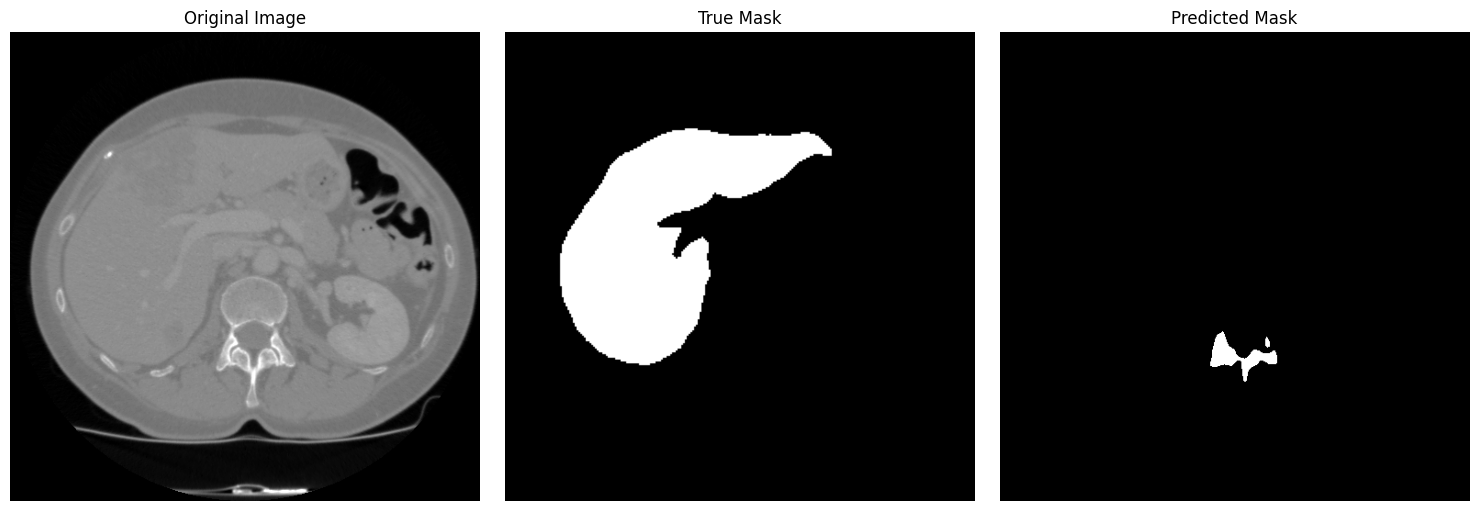

In [33]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision.transforms import Resize, Normalize
from skimage.measure import find_contours
from sklearn.metrics import jaccard_score
from copy import deepcopy

# Function to load DICOM file
def load_dicom_image(file_path):
    dicom = pydicom.dcmread(file_path)
    image = dicom.pixel_array
    return image

# Function to preprocess the image
def preprocess_image(image, target_size):
    # Normalize the image
    image = image / 255.0

    # Convert to 3-channel format
    image = np.stack([image] * 3, axis=-1)

    # Resize the image
    image = Resize((target_size, target_size))(torch.tensor(image).permute(2, 0, 1).unsqueeze(0)).squeeze(0)

    # Normalize the image with the mean and std of ImageNet
    normalize = Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    image = normalize(image)

    return image

# Function to resize the mask to the target size
def resize_mask(mask, target_size):
    mask = torch.tensor(mask).float().unsqueeze(0).unsqueeze(0)
    resized_mask = torch.nn.functional.interpolate(mask, size=(target_size, target_size), mode='nearest')
    return resized_mask.squeeze().numpy().astype(np.uint8)

# Function to compute Dice score
def dice_score(pred, true):
    intersection = np.sum(pred * true)
    return 2.0 * intersection / (np.sum(pred) + np.sum(true))

# Function to compute Jaccard index
def jaccard_index(pred, true):
    return jaccard_score(true.flatten(), pred.flatten(), average='binary')

# Function to find polygonal contour of the liver
def find_polygonal_contour(mask):
    contours = find_contours(mask, 0.5)
    if len(contours) == 0:
        return None
    # Assuming the liver is the largest contour
    liver_contour = max(contours, key=lambda x: len(x))
    return liver_contour

# Load original image and mask
original_image_path = '/content/drive/MyDrive/Colab Notebooks/3Dircadb1/3Dircadb1.1/PATIENT_DICOM/image_72.dcm'
mask_image_path = '/content/drive/MyDrive/Colab Notebooks/3Dircadb1/3Dircadb1.1/MASKS_DICOM/liver/image_72.dcm'

original_image = load_dicom_image(original_image_path)
true_mask = load_dicom_image(mask_image_path)

# Define the target image size
target_image_size = 256  # Define the target size for the image

# Preprocess the original image
preprocessed_image = preprocess_image(original_image, target_image_size)

# Resize the true mask to the target image size
resized_true_mask = resize_mask(true_mask, target_image_size)

# Convert preprocessed image to tensor and move to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_image = preprocessed_image.unsqueeze(0).to(device).float()

# Find polygonal contour of liver in the true mask
polygon = find_polygonal_contour(resized_true_mask)
if polygon is not None:
    # Normalize the polygon coordinates to the resized image
    scale_x = target_image_size / original_image.shape[1]
    scale_y = target_image_size / original_image.shape[0]
    polygon[:, 1] *= scale_x
    polygon[:, 0] *= scale_y
    polygon = np.flip(polygon, axis=1)  # Flip to match (x, y) format

    # Make a copy to avoid negative strides
    polygon = polygon.copy()

    # Create strategic points from the polygon
    point_coords = torch.tensor(polygon).float().to(device)
    point_labels = torch.ones(point_coords.shape[0]).to(device)  # Assuming 1 is the label for the liver
else:
    print("Liver not found in the mask.")
    point_coords = None
    point_labels = None

# Load the SAM-med2d model (assuming it's already set up)
# Load the SAM-med2d model (replace with actual model loading code)

# Assuming pixel_mean and pixel_std are tensors of shape (3,)
class SammedPredictor:
    def __init__(self, model, device):
        self.model = model
        self.device = device
        self.input_image = None
        self.is_image_set = False
        self.original_size = None
        self.new_size = None

    def set_image(self, image):
        pixel_mean = self.model.pixel_mean.squeeze().cpu().numpy()
        pixel_std = self.model.pixel_std.squeeze().cpu().numpy()

        input_image = (image - torch.tensor(pixel_mean).reshape(1, 3, 1, 1).to(image.device)) / torch.tensor(pixel_std).reshape(1, 3, 1, 1).to(image.device)
        self.input_image = input_image.to(self.device).float()
        self.is_image_set = True

    def predict(self, point_coords=None, point_labels=None):
        # Predict the mask using the model
        with torch.no_grad():
            if point_coords is not None and point_labels is not None:
                # Package point_coords and point_labels into a dictionary
                point_dict = {
                    'points': point_coords.float(),
                    'labels': point_labels.float()
                }
                # Create a dictionary for the input image
                image_dict = {'image': self.input_image, 'original_size': self.original_size}
                output = self.model(image_dict, point_dict)  # Pass both dictionaries to the model
            else:
                # Create a dictionary for the input image
                image_dict = {'image': self.input_image, 'original_size': self.original_size}
                output = self.model(image_dict)
        return output

# Assuming the predictor is instantiated properly with the model and device
# Replace the following line with the actual model loading code
model = sam_model_registry["vit_b"](args).to(device)  # Example: Load vit_b model

predictor = SammedPredictor(model, device)

predictor.set_image(input_image)

# Set necessary attributes
predictor.original_size = (original_image.shape[0], original_image.shape[1])
predictor.new_size = (target_image_size, target_image_size)

# Define a function to apply coordinates transformation
def apply_coords(coords, original_size, new_size):
    old_h, old_w = original_size
    new_h, new_w = new_size
    # Convert the tensor to a NumPy array before using astype
    coords = deepcopy(coords.cpu().numpy()).astype(float)
    coords[..., 0] = coords[..., 0] * (new_w / old_w)
    coords[..., 1] = coords[..., 1] * (new_h / old_h)
    return torch.tensor(coords).to(device).float()  # Convert back to a PyTorch tensor

# Predict the mask using the SAM-med2d model
if point_coords is not None and point_labels is not None:
    transformed_coords = apply_coords(point_coords, predictor.original_size, predictor.new_size)
    output = predictor.predict(point_coords=transformed_coords, point_labels=point_labels)
else:
    output = predictor.predict()

# Extract the predicted mask from the output dictionary
predicted_mask = output['masks'].squeeze()  # Remove extra dimension

# If there are multiple channels, handle them appropriately
if predicted_mask.ndim > 2 and predicted_mask.shape[0] == 3:
    # Assuming the predicted mask has 3 channels, take the first one (or modify this as needed)
    predicted_mask = predicted_mask[0]

# Resize the predicted mask back to the original image size
predicted_mask = predicted_mask.unsqueeze(0).unsqueeze(0).float().to(device)
predicted_mask = torch.nn.functional.interpolate(predicted_mask,
                                                size=(original_image.shape[0], original_image.shape[1]),
                                                mode='nearest')
predicted_mask = predicted_mask.squeeze().cpu().numpy()

# Post-process the predicted mask (e.g., thresholding)
predicted_mask = (predicted_mask > 0.5).astype(np.uint8)

# Ensure true mask is also binary
true_mask = (true_mask > 0).astype(np.uint8)

# Compute evaluation metrics
dice = dice_score(predicted_mask, true_mask)
jaccard = jaccard_index(predicted_mask, true_mask)

print(f"Dice Score: {dice}")
print(f"Jaccard Index: {jaccard}")

# Debug: print shapes to verify
print(f"Original image shape: {original_image.shape}")
print(f"Preprocessed image shape: {preprocessed_image.shape}")
print(f"True mask shape: {true_mask.shape}")
print(f"Resized true mask shape: {resized_true_mask.shape}")
print(f"Predicted mask shape: {predicted_mask.shape}")

# Plot the original image, true mask, and predicted mask
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(original_image, cmap='gray')
axes[0].set_title('Original Image')

axes[1].imshow(resized_true_mask, cmap='gray')
axes[1].set_title('True Mask')

axes[2].imshow(predicted_mask, cmap='gray')
axes[2].set_title('Predicted Mask')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()


Bounding box coordinates: tensor([[ 30.,  53.],
        [177., 181.]])


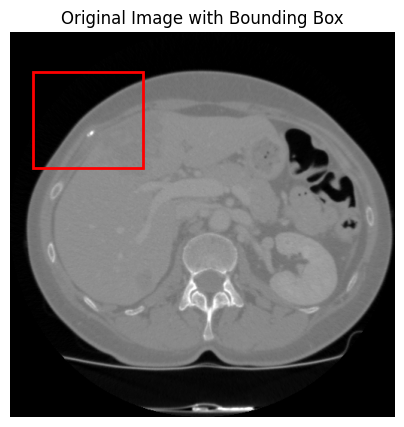

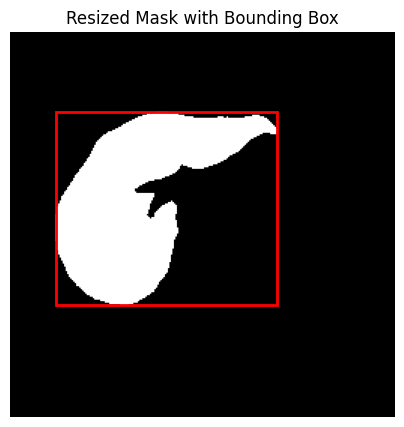

True
*******load ./SAM_Med2D/pretrain_model/sam-med2d_b.pth


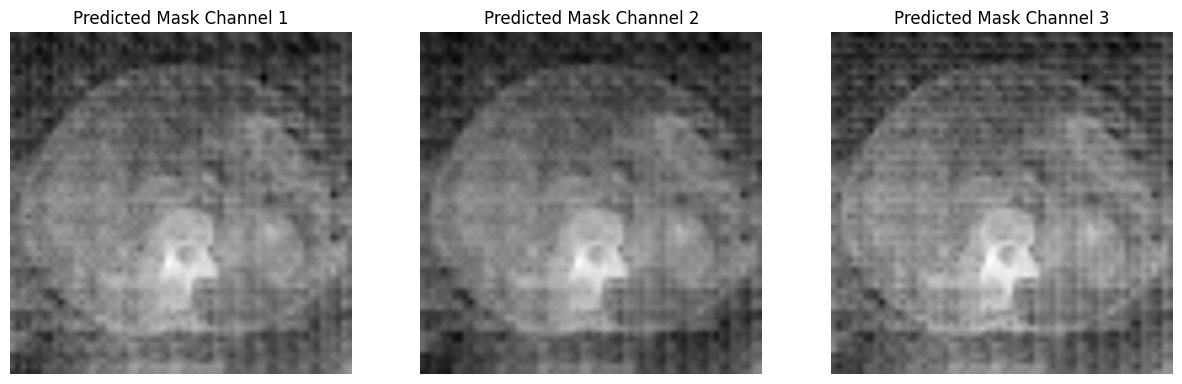

Dice Score: 0.0
Jaccard Index: 0.0


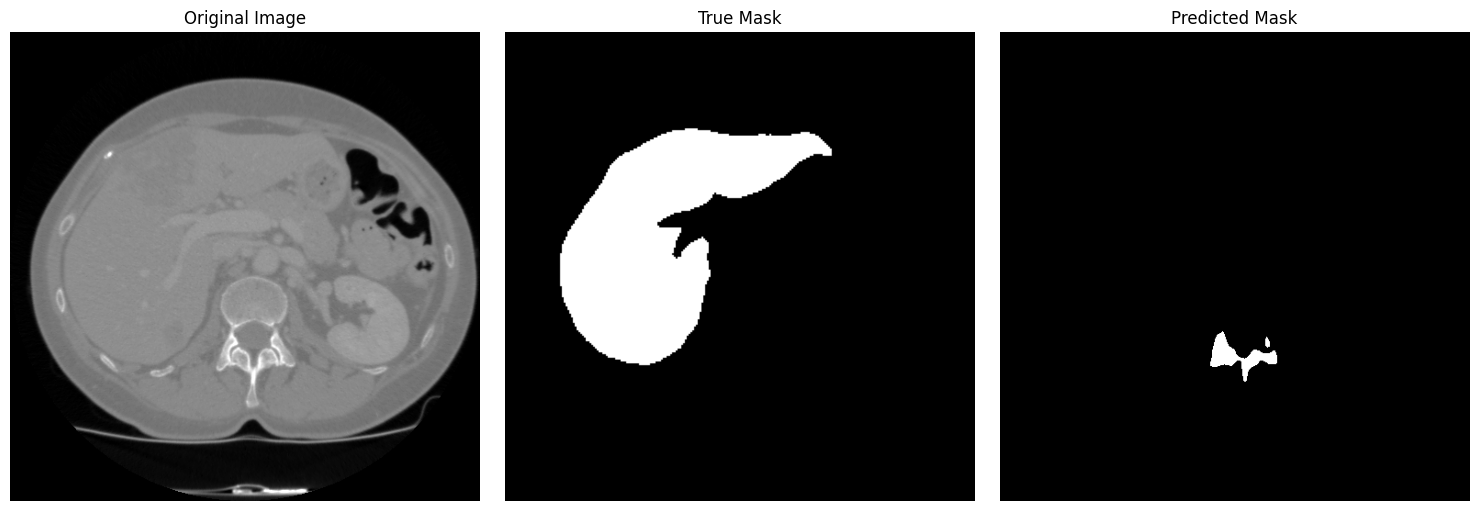

In [43]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision.transforms import Resize, Normalize
from sklearn.metrics import jaccard_score

# Function to load DICOM file
def load_dicom_image(file_path):
    dicom = pydicom.dcmread(file_path)
    image = dicom.pixel_array
    return image

# Function to preprocess the image
def preprocess_image(image, target_size):
    # Normalize the image
    image = image / 255.0

    # Convert to 3-channel format
    image = np.stack([image] * 3, axis=-1)

    # Resize the image
    image = Resize((target_size, target_size))(torch.tensor(image).permute(2, 0, 1).unsqueeze(0)).squeeze(0)

    # Normalize the image with the mean and std of ImageNet
    normalize = Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    image = normalize(image)

    return image

# Function to resize the mask to the target size
def resize_mask(mask, target_size):
    mask = torch.tensor(mask).float().unsqueeze(0).unsqueeze(0)
    resized_mask = torch.nn.functional.interpolate(mask, size=(target_size, target_size), mode='nearest')
    return resized_mask.squeeze().numpy().astype(np.uint8)

# Function to compute Dice score
def dice_score(pred, true):
    intersection = np.sum(pred * true)
    return 2.0 * intersection / (np.sum(pred) + np.sum(true))

# Function to compute Jaccard index
def jaccard_index(pred, true):
    return jaccard_score(true.flatten(), pred.flatten(), average='binary')

# Function to find bounding box of the liver
def find_bounding_box(mask):
    non_zero_indices = np.argwhere(mask)
    minr, minc = non_zero_indices.min(axis=0)
    maxr, maxc = non_zero_indices.max(axis=0)
    return minr, minc, maxr, maxc

# Load original image and mask
original_image_path = '/content/drive/MyDrive/Colab Notebooks/3Dircadb1/3Dircadb1.1/PATIENT_DICOM/image_72.dcm'
mask_image_path = '/content/drive/MyDrive/Colab Notebooks/3Dircadb1/3Dircadb1.1/MASKS_DICOM/liver/image_72.dcm'

original_image = load_dicom_image(original_image_path)
true_mask = load_dicom_image(mask_image_path)

# Define the target image size
target_image_size = 256  # Define the target size for the image

# Preprocess the original image
preprocessed_image = preprocess_image(original_image, target_image_size)

# Resize the true mask to the target image size
resized_true_mask = resize_mask(true_mask, target_image_size)

# Convert preprocessed image to tensor and move to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_image = preprocessed_image.unsqueeze(0).to(device).float()

# Find bounding box of liver in the true mask
minr, minc, maxr, maxc = find_bounding_box(resized_true_mask)
bbox_coords = torch.tensor([[minc, minr], [maxc, maxr]]).float().to(device)
print(f"Bounding box coordinates: {bbox_coords}")

# Visualize the bounding box on the original image
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.imshow(original_image, cmap='gray')
rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='red', linewidth=2)
ax.add_patch(rect)
ax.set_title('Original Image with Bounding Box')
ax.axis('off')
plt.show()

# Visualize the bounding box on the resized mask
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.imshow(resized_true_mask, cmap='gray')
rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='red', linewidth=2)
ax.add_patch(rect)
ax.set_title('Resized Mask with Bounding Box')
ax.axis('off')
plt.show()

# Load the SAM-med2d model (assuming it's already set up)
# Replace this with the actual model loading code
# Example: model = load_your_model()

# Assuming pixel_mean and pixel_std are tensors of shape (3,)
class SammedPredictor:
    def __init__(self, model, device):
        self.model = model
        self.device = device
        self.input_image = None
        self.is_image_set = False
        self.original_size = None
        self.new_size = None

    def set_image(self, image):
        pixel_mean = self.model.pixel_mean.squeeze().cpu().numpy()
        pixel_std = self.model.pixel_std.squeeze().cpu().numpy()

        input_image = (image - torch.tensor(pixel_mean).reshape(1, 3, 1, 1).to(image.device)) / torch.tensor(pixel_std).reshape(1, 3, 1, 1).to(image.device)
        self.input_image = input_image.to(self.device).float()
        self.is_image_set = True

    def predict(self, bbox_coords=None):
        # Predict the mask using the model
        with torch.no_grad():
            if bbox_coords is not None:
                # Package bounding box coordinates into a dictionary
                bbox_dict = {
                    'bbox': bbox_coords.float()
                }
                # Create a dictionary for the input image
                image_dict = {'image': self.input_image, 'original_size': self.original_size}
                output = self.model(image_dict, bbox_dict)  # Pass both dictionaries to the model
            else:
                # Create a dictionary for the input image
                image_dict = {'image': self.input_image, 'original_size': self.original_size}
                output = self.model(image_dict)
        return output

# Assuming the predictor is instantiated properly with the model and device
# Replace the following line with the actual model loading code
model = sam_model_registry["vit_b"](args).to(device)  # Example: Load vit_b model

predictor = SammedPredictor(model, device)

predictor.set_image(input_image)

# Set necessary attributes
predictor.original_size = (original_image.shape[0], original_image.shape[1])
predictor.new_size = (target_image_size, target_image_size)

# Predict the mask using the SAM-med2d model
output = predictor.predict(bbox_coords=bbox_coords)

# Extract the predicted mask from the output dictionary
predicted_masks = output['masks'].squeeze()  # Remove extra dimension

# Visualize each channel of the predicted mask
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    axes[i].imshow(predicted_masks[i].cpu().numpy(), cmap='gray')
    axes[i].set_title(f'Predicted Mask Channel {i+1}')
    axes[i].axis('off')
plt.show()

# Select the appropriate channel
predicted_mask = predicted_masks[0]  # Assuming the first channel is the most relevant

# Resize the predicted mask back to the original image size
predicted_mask = predicted_mask.unsqueeze(0).unsqueeze(0).float().to(device)
predicted_mask = torch.nn.functional.interpolate(predicted_mask,
                                                size=(original_image.shape[0], original_image.shape[1]),
                                                mode='nearest')
predicted_mask = predicted_mask.squeeze().cpu().numpy()

# Post-process the predicted mask (e.g., thresholding)
predicted_mask = (predicted_mask > 0.5).astype(np.uint8)

# Ensure true mask is also binary
true_mask = (true_mask > 0).astype(np.uint8)

# Compute evaluation metrics
dice = dice_score(predicted_mask, true_mask)
jaccard = jaccard_index(predicted_mask, true_mask)

print(f"Dice Score: {dice}")
print(f"Jaccard Index: {jaccard}")

# Plot the original image, true mask, and predicted mask
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(original_image, cmap='gray')
axes[0].set_title('Original Image')

axes[1].imshow(resized_true_mask, cmap='gray')
axes[1].set_title('True Mask')

axes[2].imshow(predicted_mask, cmap='gray')
axes[2].set_title('Predicted Mask')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()


Bounding box coordinates: tensor([[ 30.,  53.],
        [177., 181.]])


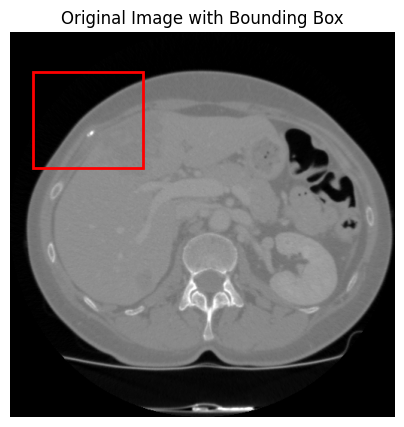

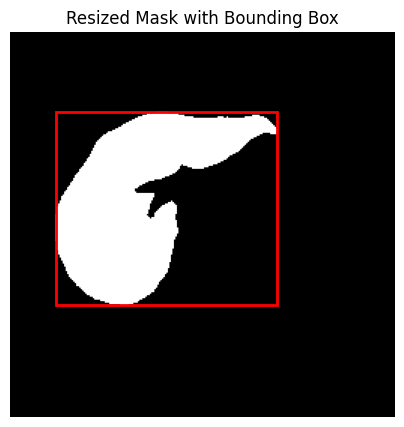

FileNotFoundError: [Errno 2] No such file or directory: 'pretrain_model/sam-med2d_b.pth'

In [61]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision.transforms import Resize, Normalize
from sklearn.metrics import jaccard_score
from SAM_Med2D.segment_anything import sam_model_registry
from SAM_Med2D.segment_anything.predictor_sammed import SammedPredictor
from argparse import Namespace
args = Namespace()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
args.image_size = 256
args.encoder_adapter = True
args.sam_checkpoint = "pretrain_model/sam-med2d_b.pth"
#model = sam_model_registry["vit_b"](args).to(device)


# Function to load DICOM file
def load_dicom_image(file_path):
    dicom = pydicom.dcmread(file_path)
    image = dicom.pixel_array
    return image

# Function to preprocess the image
def preprocess_image(image, target_size):
    # Normalize the image
    image = image / 255.0

    # Convert to 3-channel format
    image = np.stack([image] * 3, axis=-1)

    # Resize the image
    image = Resize((target_size, target_size))(torch.tensor(image).permute(2, 0, 1).unsqueeze(0)).squeeze(0)

    # Normalize the image with the mean and std of ImageNet
    normalize = Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    image = normalize(image)

    return image

# Function to resize the mask to the target size
def resize_mask(mask, target_size):
    mask = torch.tensor(mask).float().unsqueeze(0).unsqueeze(0)
    resized_mask = torch.nn.functional.interpolate(mask, size=(target_size, target_size), mode='nearest')
    return resized_mask.squeeze().numpy().astype(np.uint8)

# Function to compute Dice score
def dice_score(pred, true):
    intersection = np.sum(pred * true)
    return 2.0 * intersection / (np.sum(pred) + np.sum(true))

# Function to compute Jaccard index
def jaccard_index(pred, true):
    return jaccard_score(true.flatten(), pred.flatten(), average='binary')

# Function to find bounding box of the liver
def find_bounding_box(mask):
    non_zero_indices = np.argwhere(mask)
    minr, minc = non_zero_indices.min(axis=0)
    maxr, maxc = non_zero_indices.max(axis=0)
    return minr, minc, maxr, maxc

# Load original image and mask
original_image_path = '/content/drive/MyDrive/Colab Notebooks/3Dircadb1/3Dircadb1.1/PATIENT_DICOM/image_72.dcm'
mask_image_path = '/content/drive/MyDrive/Colab Notebooks/3Dircadb1/3Dircadb1.1/MASKS_DICOM/liver/image_72.dcm'

original_image = load_dicom_image(original_image_path)
true_mask = load_dicom_image(mask_image_path)

# Define the target image size
target_image_size = 256  # Define the target size for the image

# Preprocess the original image
preprocessed_image = preprocess_image(original_image, target_image_size)

# Resize the true mask to the target image size
resized_true_mask = resize_mask(true_mask, target_image_size)

# Convert preprocessed image to tensor and move to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_image = preprocessed_image.unsqueeze(0).to(device).float()

# Find bounding box of liver in the true mask
minr, minc, maxr, maxc = find_bounding_box(resized_true_mask)
bbox_coords = torch.tensor([[minc, minr], [maxc, maxr]]).float().to(device)
print(f"Bounding box coordinates: {bbox_coords}")

# Visualize the bounding box on the original image
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.imshow(original_image, cmap='gray')
rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='red', linewidth=2)
ax.add_patch(rect)
ax.set_title('Original Image with Bounding Box')
ax.axis('off')
plt.show()

# Visualize the bounding box on the resized mask
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.imshow(resized_true_mask, cmap='gray')
rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='red', linewidth=2)
ax.add_patch(rect)
ax.set_title('Resized Mask with Bounding Box')
ax.axis('off')
plt.show()

# Load the SAM-med2d model (assuming it's already set up)
model = sam_model_registry["vit_b"](args).to(device)  # Example: Load vit_b model

# Initialize SammedPredictor
predictor = SammedPredictor(model, device)

# Set the image in the predictor
predictor.set_image(input_image)

# Perform prediction using bounding box
output = predictor.predict(bbox_coords=bbox_coords)

# Extract the predicted mask from the output dictionary
predicted_masks = output['masks'].squeeze()  # Remove extra dimension

# Visualize each channel of the predicted mask
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    axes[i].imshow(predicted_masks[i].cpu().numpy(), cmap='gray')
    axes[i].set_title(f'Predicted Mask Channel {i+1}')
    axes[i].axis('off')
plt.show()

# Select the appropriate channel
predicted_mask = predicted_masks[0]  # Assuming the first channel is the most relevant

# Resize the predicted mask back to the original image size
predicted_mask = predicted_mask.unsqueeze(0).unsqueeze(0).float().to(device)
predicted_mask = torch.nn.functional.interpolate(predicted_mask,
                                                size=(original_image.shape[0], original_image.shape[1]),
                                                mode='nearest')
predicted_mask = predicted_mask.squeeze().cpu().numpy()

# Post-process the predicted mask (e.g., thresholding)
predicted_mask = (predicted_mask > 0.5).astype(np.uint8)

# Ensure true mask is also binary
true_mask = (true_mask > 0).astype(np.uint8)

# Compute evaluation metrics
dice = dice_score(predicted_mask, true_mask)
jaccard = jaccard_index(predicted_mask, true_mask)

print(f"Dice Score: {dice}")
print(f"Jaccard Index: {jaccard}")

# Plot the original image, true mask, and predicted mask
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(original_image, cmap='gray')
axes[0].set_title('Original Image')

axes[1].imshow(resized_true_mask, cmap='gray')
axes[1].set_title('True Mask')

axes[2].imshow(predicted_mask, cmap='gray')
axes[2].set_title('Predicted Mask')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()


In [9]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt
import torch
#from sam_med2d import SamMed2d

# Function to load DICOM file
def load_dicom_image(file_path):
    dicom = pydicom.dcmread(file_path)
    image = dicom.pixel_array
    return image

# Load original image and mask
original_image_path = '/content/drive/MyDrive/Colab Notebooks/3Dircadb1/3Dircadb1.1/PATIENT_DICOM/image_72.dcm'
mask_image_path = '/content/drive/MyDrive/Colab Notebooks/3Dircadb1/3Dircadb1.1/MASKS_DICOM/liver/image_72.dcm'

original_image = load_dicom_image(original_image_path)
true_mask = load_dicom_image(mask_image_path)

# Initialize the SAM-med2d model (assuming it’s pre-trained and available)
model = SammedPredictor()

# Preprocess the image for the model
input_image = torch.tensor(original_image).unsqueeze(0).unsqueeze(0).float() / 255.0

# Predict the mask using the SAM-med2d model
with torch.no_grad():
    predicted_mask = model(input_image)
predicted_mask = predicted_mask.squeeze().numpy()

# Plot the original image, true mask, and predicted mask
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(original_image, cmap='gray')
axes[0].set_title('Original Image')

axes[1].imshow(true_mask, cmap='gray')
axes[1].set_title('True Mask')

axes[2].imshow(predicted_mask, cmap='gray')
axes[2].set_title('Predicted Mask')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()


TypeError: SammedPredictor.__init__() missing 1 required positional argument: 'sam_model'

In [2]:
! pip install pydicom
! pip install torch
! pip install torchvision
! pip install segment_anything
! pip install scikit-image


In [4]:
# Step 4: Clone SAM-Med2D repository and install dependencies
!git clone https://github.com/OpenGVLab/SAM-Med2D.git SAM_Med2D

# Check PyTorch and torchvision versions
import os
import torch
import torchvision
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())

!pip install opencv-python matplotlib

# Step 5: Download the SAM-Med2D model weights
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

ROOT_DIR = '.'
CODE_DIR = f"{ROOT_DIR}/SAM_Med2D"
MODEL_DIR = f"{CODE_DIR}/pretrain_model"
os.makedirs(f'{MODEL_DIR}', exist_ok=True)

class Downloader(object):
  def __init__(self, use_pydrive, save_dir='.'):
    self.use_pydrive = use_pydrive
    self.save_dir = save_dir
    if self.use_pydrive:
      self.authenticate()

  def authenticate(self):
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    self.drive = GoogleDrive(gauth)

  def download_file(self, file_id, file_name):
    file_dst = f'{self.save_dir}/{file_name}'
    if os.path.exists(file_dst):
      print(f'{file_name} already exists')
      return
    downloaded = self.drive.CreateFile({'id': file_id})
    downloaded.FetchMetadata(fetch_all=True)
    downloaded.GetContentFile(file_dst)

downloader = Downloader(True, MODEL_DIR)

sam_med2d_model = {'id': '1ARiB5RkSsWmAB_8mqWnwDF8ZKTtFwsjl', 'name': 'sam-med2d_b.pth'}
downloader.download_file(file_id=sam_med2d_model['id'], file_name=sam_med2d_model['name'])

# Step 6: Load SAM-med2d model and perform segmentation
import sys
sys.path.append(ROOT_DIR) # Make sure the import SAM_Med2D.segment_anything works

from SAM_Med2D.segment_anything import sam_model_registry
from SAM_Med2D.segment_anything.predictor_sammed import SammedPredictor
from argparse import Namespace

args = Namespace()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
args.image_size = 256
args.encoder_adapter = True
args.sam_checkpoint = f"{MODEL_DIR}/sam-med2d_b.pth"
model = sam_model_registry["vit_b"](args).to(device)
predictor = SammedPredictor(model)



Cloning into 'SAM_Med2D'...
remote: Enumerating objects: 350, done.
remote: Counting objects: 100% (119/119), done.
remote: Compressing objects: 100% (106/106), done.
remote: Total 350 (delta 69), reused 35 (delta 13), pack-reused 231
Receiving objects: 100% (350/350), 30.23 MiB | 30.92 MiB/s, done.
Resolving deltas: 100% (158/158), done.
PyTorch version: 2.3.0+cu121
Torchvision version: 0.18.0+cu121
CUDA is available: True


True
*******load ./SAM_Med2D/pretrain_model/sam-med2d_b.pth


True
*******load /content/SAM_Med2D/pretrain_model/sam-med2d_b.pth
True
*******load ./SAM_Med2D/pretrain_model/sam-med2d_b.pth
Jaccard Index: 0.6721
Dice Score: 0.8039


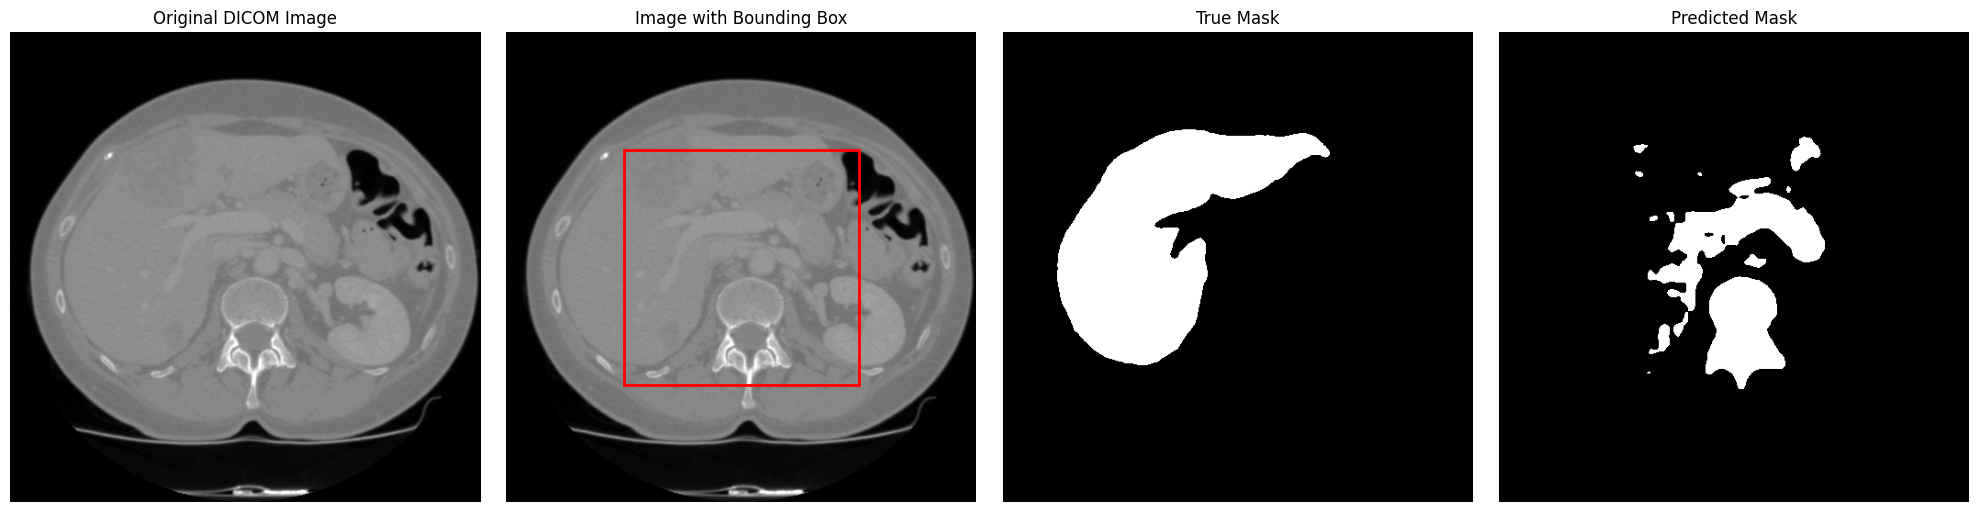

In [12]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import pydicom
from segment_anything import sam_model_registry, SamPredictor
import torch.nn.functional as F
from sklearn.metrics import jaccard_score, f1_score

# Path to your DICOM image and true mask
dicom_path = '/content/drive/MyDrive/Colab Notebooks/3Dircadb1/3Dircadb1.1/PATIENT_DICOM/image_72.dcm'  # Assuming the image is in DICOM format
true_mask_path = '/content/drive/MyDrive/Colab Notebooks/3Dircadb1/3Dircadb1.1/MASKS_DICOM/liver/image_72.dcm'  # Assuming the mask is also in DICOM format

# Load the DICOM image
dicom = pydicom.dcmread(dicom_path)
image = dicom.pixel_array

# Normalize the image to 0-255 range
image = ((image - image.min()) / (image.max() - image.min()) * 255).astype(np.uint8)

# Add a channel dimension to the image
image = np.expand_dims(image, axis=-1)  # Add channel dimension as the last dimension
image = np.repeat(image, 3, axis=-1) # Repeat grayscale for each channel

# Load the true mask (assuming it's also a DICOM file)
true_mask_dicom = pydicom.dcmread(true_mask_path)
true_mask = true_mask_dicom.pixel_array


from SAM_Med2D.segment_anything import sam_model_registry
from SAM_Med2D.segment_anything.predictor_sammed import SammedPredictor
from argparse import Namespace
args = Namespace()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
args.image_size = 256
args.encoder_adapter = True
args.sam_checkpoint = "/content/SAM_Med2D/pretrain_model/sam-med2d_b.pth"
model = sam_model_registry["vit_b"](args).to(device)
predictor = SammedPredictor(model)

# Load the SAM-MED2D model
sam_checkpoint = "/content/SAM_Med2D/pretrain_model/sam-med2d_b.pth"
model_type = "vit_b"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

args.sam_checkpoint = f"{MODEL_DIR}/sam-med2d_b.pth"
sam = sam_model_registry["vit_b"](args).to(device)
#sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

# Set the image
predictor.set_image(image)

def calculate_metrics(true_mask, pred_mask):
    true_mask = true_mask.flatten()
    pred_mask = pred_mask.flatten()

    # Use 'micro' averaging for multiclass problems
    jaccard = jaccard_score(true_mask, pred_mask, average='micro')
    dice = f1_score(true_mask, pred_mask, average='micro')

    return jaccard, dice

# Predict the mask
# Generate bounding box (you may need to adjust this based on your specific use case)
# Format: [x_min, y_min, x_max, y_max]
input_box = np.array([image.shape[1] * 0.25, image.shape[0] * 0.25,
                      image.shape[1] * 0.75, image.shape[0] * 0.75])

# Generate masks using bounding box
masks, scores, logits = predictor.predict(
    box=input_box[None, :],
    multimask_output=True,
)

# Select the mask with the highest score
predicted_mask = masks[np.argmax(scores)]

# Calculate Jaccard Index and Dice Score
jaccard, dice = calculate_metrics(true_mask, predicted_mask)

print(f"Jaccard Index: {jaccard:.4f}")
print(f"Dice Score: {dice:.4f}")

# Visualize the results
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title("Original DICOM Image")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(image, cmap='gray')
plt.title("Image with Bounding Box")
plt.gca().add_patch(plt.Rectangle((input_box[0], input_box[1]),
                                  input_box[2] - input_box[0],
                                  input_box[3] - input_box[1],
                                  fill=False, edgecolor='red', linewidth=2))
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(true_mask, cmap='gray')
plt.title("True Mask")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(predicted_mask, cmap='gray')
plt.title("Predicted Mask")
plt.axis('off')

plt.tight_layout()
plt.show()

True
*******load /content/SAM_Med2D/pretrain_model/sam-med2d_b.pth
True
*******load ./SAM_Med2D/pretrain_model/sam-med2d_b.pth
Jaccard Index: 0.6836
Dice Score: 0.8121


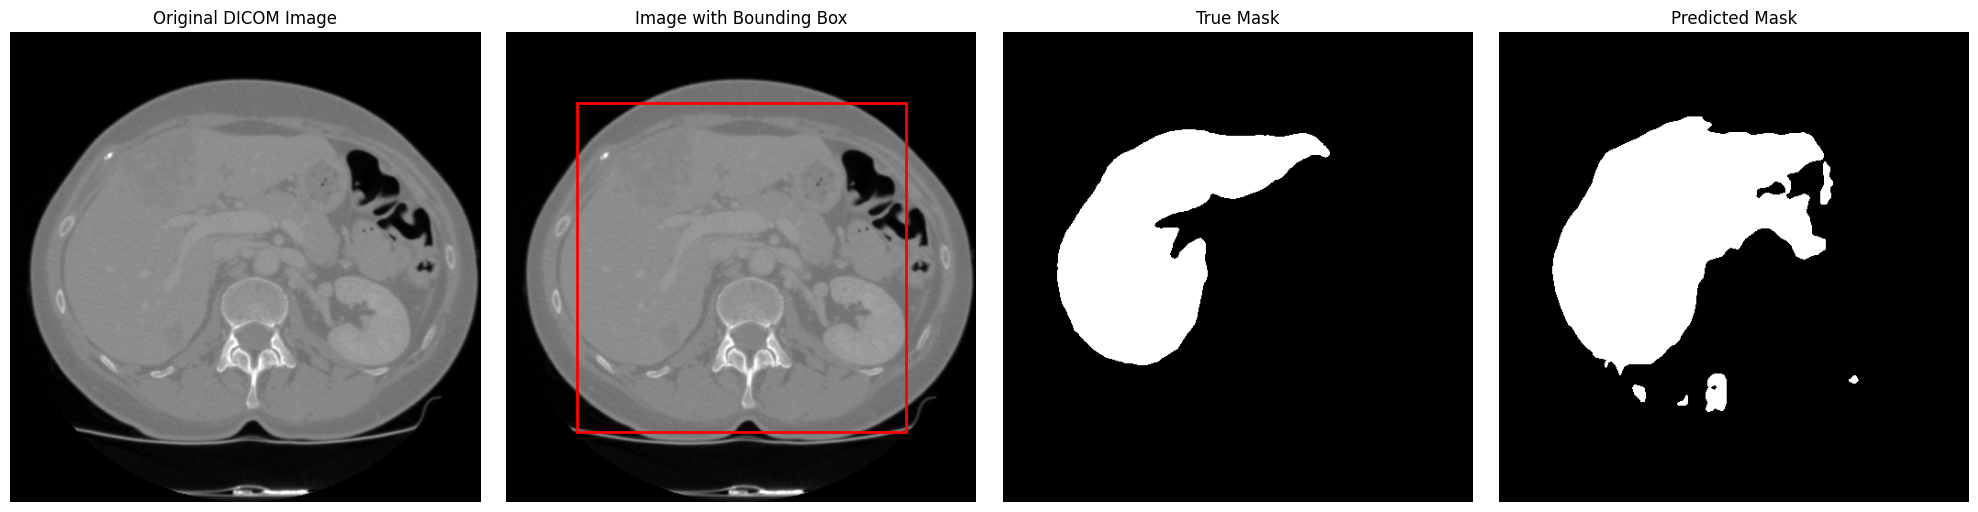

In [25]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import pydicom
from segment_anything import sam_model_registry, SamPredictor
import torch.nn.functional as F
from sklearn.metrics import jaccard_score, f1_score
from argparse import Namespace

# Path to your DICOM image and true mask
dicom_path = '/content/drive/MyDrive/Colab Notebooks/3Dircadb1/3Dircadb1.1/PATIENT_DICOM/image_72.dcm'  # Assuming the image is in DICOM format
true_mask_path = '/content/drive/MyDrive/Colab Notebooks/3Dircadb1/3Dircadb1.1/MASKS_DICOM/liver/image_72.dcm'  # Assuming the mask is also in DICOM format

# Load the DICOM image
dicom = pydicom.dcmread(dicom_path)
image = dicom.pixel_array

# Normalize the image to 0-255 range
image = ((image - image.min()) / (image.max() - image.min()) * 255).astype(np.uint8)

# Add a channel dimension to the image
image = np.expand_dims(image, axis=-1)  # Add channel dimension as the last dimension
image = np.repeat(image, 3, axis=-1)  # Repeat grayscale for each channel


from SAM_Med2D.segment_anything import sam_model_registry
from SAM_Med2D.segment_anything.predictor_sammed import SammedPredictor
from argparse import Namespace
args = Namespace()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
args.image_size = 256
args.encoder_adapter = True
args.sam_checkpoint = "/content/SAM_Med2D/pretrain_model/sam-med2d_b.pth"
model = sam_model_registry["vit_b"](args).to(device)
predictor = SammedPredictor(model)

# Load the SAM-MED2D model
sam_checkpoint = "/content/SAM_Med2D/pretrain_model/sam-med2d_b.pth"
model_type = "vit_b"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

args.sam_checkpoint = f"{MODEL_DIR}/sam-med2d_b.pth"
sam = sam_model_registry["vit_b"](args).to(device)
#sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

# Set the image
predictor.set_image(image)

def calculate_metrics(true_mask, pred_mask):
    true_mask = true_mask.flatten()
    pred_mask = pred_mask.flatten()
    jaccard = jaccard_score(true_mask, pred_mask, average='micro')
    dice = f1_score(true_mask, pred_mask, average='micro')
    return jaccard, dice

# Generate bounding box (adjust this based on your specific use case)
input_box = np.array([image.shape[1] * 0.15, image.shape[0] * 0.15,
                      image.shape[1] * 0.85, image.shape[0] * 0.85])

# Generate masks using bounding box
masks, scores, logits = predictor.predict(
    box=input_box[None, :],
    multimask_output=True,
)

# Select the mask with the highest score
predicted_mask = masks[np.argmax(scores)]

# Calculate Jaccard Index and Dice Score
jaccard, dice = calculate_metrics(true_mask, predicted_mask)

print(f"Jaccard Index: {jaccard:.4f}")
print(f"Dice Score: {dice:.4f}")

# Visualize the results
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title("Original DICOM Image")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(image, cmap='gray')
plt.title("Image with Bounding Box")
plt.gca().add_patch(plt.Rectangle((input_box[0], input_box[1]),
                                  input_box[2] - input_box[0],
                                  input_box[3] - input_box[1],
                                  fill=False, edgecolor='red', linewidth=2))
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(true_mask, cmap='gray')
plt.title("True Mask")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(predicted_mask, cmap='gray')
plt.title("Predicted Mask")
plt.axis('off')

plt.tight_layout()
plt.show()


True
*******load /content/SAM_Med2D/pretrain_model/sam-med2d_b.pth
True
*******load ./SAM_Med2D/pretrain_model/sam-med2d_b.pth
Jaccard Index: 0.7134
Dice Score: 0.8328


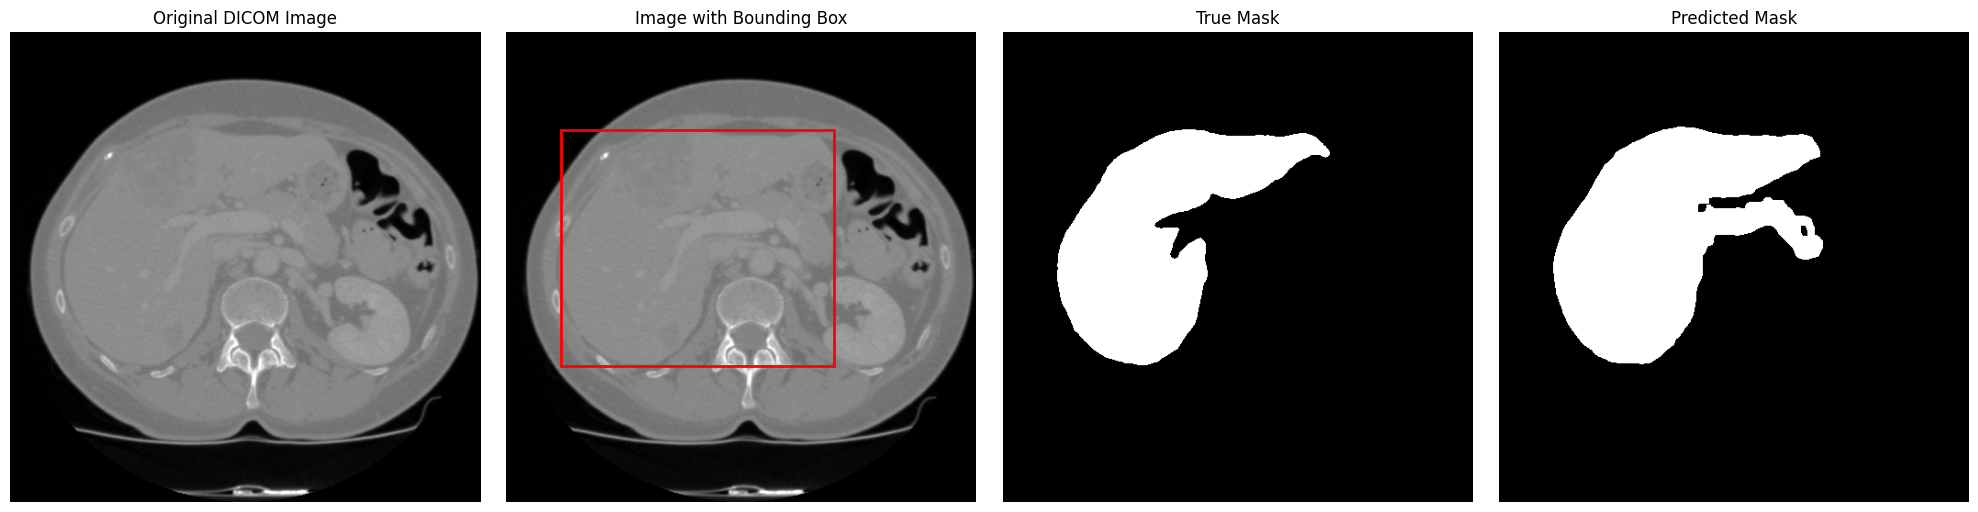

In [28]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import pydicom
from segment_anything import sam_model_registry, SamPredictor
import torch.nn.functional as F
from sklearn.metrics import jaccard_score, f1_score
from argparse import Namespace
from scipy.ndimage import binary_closing, binary_opening
from skimage.measure import regionprops
from skimage.morphology import label

# Path to your DICOM image and true mask
dicom_path = '/content/drive/MyDrive/Colab Notebooks/3Dircadb1/3Dircadb1.1/PATIENT_DICOM/image_72.dcm'  # Assuming the image is in DICOM format
true_mask_path = '/content/drive/MyDrive/Colab Notebooks/3Dircadb1/3Dircadb1.1/MASKS_DICOM/liver/image_72.dcm'  # Assuming the mask is also in DICOM format


# Load the DICOM image
dicom = pydicom.dcmread(dicom_path)
image = dicom.pixel_array

# Normalize the image to 0-255 range
image = ((image - image.min()) / (image.max() - image.min()) * 255).astype(np.uint8)

# Add a channel dimension to the image
image = np.expand_dims(image, axis=-1)  # Add channel dimension as the last dimension
image = np.repeat(image, 3, axis=-1)  # Repeat grayscale for each channel

# Load the true mask (assuming it's also a DICOM file)
true_mask_dicom = pydicom.dcmread(true_mask_path)
true_mask = true_mask_dicom.pixel_array

# Find bounding box from true mask
labeled_mask = label(true_mask)
props = regionprops(labeled_mask)
min_row, min_col, max_row, max_col = props[0].bbox

input_box = np.array([min_col, min_row, max_col, max_row])


from SAM_Med2D.segment_anything import sam_model_registry
from SAM_Med2D.segment_anything.predictor_sammed import SammedPredictor
from argparse import Namespace
args = Namespace()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
args.image_size = 256
args.encoder_adapter = True
args.sam_checkpoint = "/content/SAM_Med2D/pretrain_model/sam-med2d_b.pth"
model = sam_model_registry["vit_b"](args).to(device)
predictor = SammedPredictor(model)

# Load the SAM-MED2D model
sam_checkpoint = "/content/SAM_Med2D/pretrain_model/sam-med2d_b.pth"
model_type = "vit_b"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

args.sam_checkpoint = f"{MODEL_DIR}/sam-med2d_b.pth"
sam = sam_model_registry["vit_b"](args).to(device)
#sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

# Initialize the predictor
predictor = SamPredictor(model)

# Set the image for the predictor
predictor.set_image(image)

def calculate_metrics(true_mask, pred_mask):
    true_mask = true_mask.flatten()
    pred_mask = pred_mask.flatten()
    jaccard = jaccard_score(true_mask, pred_mask, average='micro')
    dice = f1_score(true_mask, pred_mask, average='micro')
    return jaccard, dice

# Generate masks using bounding box
masks, scores, logits = predictor.predict(
    box=input_box[None, :],
    multimask_output=True,
)

# Select the mask with the highest score
predicted_mask = masks[np.argmax(scores)]

# Post-process the predicted mask
predicted_mask = binary_closing(predicted_mask, structure=np.ones((5,5))).astype(np.uint8)
predicted_mask = binary_opening(predicted_mask, structure=np.ones((5,5))).astype(np.uint8)

# Calculate Jaccard Index and Dice Score
jaccard, dice = calculate_metrics(true_mask, predicted_mask)

print(f"Jaccard Index: {jaccard:.4f}")
print(f"Dice Score: {dice:.4f}")

# Visualize the results
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title("Original DICOM Image")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(image, cmap='gray')
plt.title("Image with Bounding Box")
plt.gca().add_patch(plt.Rectangle((input_box[0], input_box[1]),
                                  input_box[2] - input_box[0],
                                  input_box[3] - input_box[1],
                                  fill=False, edgecolor='red', linewidth=2))
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(true_mask, cmap='gray')
plt.title("True Mask")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(predicted_mask, cmap='gray')
plt.title("Predicted Mask")
plt.axis('off')

plt.tight_layout()
plt.show()


In [33]:
!pip install --upgrade scikit-image
import numpy as np
import torch
import matplotlib.pyplot as plt
import pydicom
from segment_anything import sam_model_registry, SamPredictor
import torch.nn.functional as F
from sklearn.metrics import jaccard_score, f1_score
from argparse import Namespace
from scipy.ndimage import binary_closing, binary_opening
from skimage.measure import label, regionprops
from skimage.morphology import binary_fill_holes

# Path to your DICOM image and true mask
dicom_path = '/content/drive/MyDrive/Colab Notebooks/3Dircadb1/3Dircadb1.1/PATIENT_DICOM/image_72.dcm'  # Assuming the image is in DICOM format
true_mask_path = '/content/drive/MyDrive/Colab Notebooks/3Dircadb1/3Dircadb1.1/MASKS_DICOM/liver/image_72.dcm'  # Assuming the mask is also in DICOM format

dicom = pydicom.dcmread(dicom_path)
image = dicom.pixel_array

true_mask_dicom = pydicom.dcmread(true_mask_path)
true_mask = true_mask_dicom.pixel_array

# Normalize the image
image = ((image - image.min()) / (image.max() - image.min()) * 255).astype(np.uint8)

# Add channel dimension to the image
image = np.expand_dims(image, axis=-1)
image = np.repeat(image, 3, axis=-1)

# Find bounding box from true mask
labeled_mask = label(true_mask)
props = regionprops(labeled_mask)
min_row, min_col, max_row, max_col = props[0].bbox

# Adjust bounding box for context
padding = 10
min_row = max(0, min_row - padding)
min_col = max(0, min_col - padding)
max_row = min(true_mask.shape[0], max_row + padding)
max_col = min(true_mask.shape[1], max_col + padding)

input_box = np.array([min_col, min_row, max_col, max_row])

# Load SAM-MED2D model
from SAM_Med2D.segment_anything import sam_model_registry
from SAM_Med2D.segment_anything.predictor_sammed import SammedPredictor
from argparse import Namespace
args = Namespace()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
args.image_size = 256
args.encoder_adapter = True
args.sam_checkpoint = "/content/SAM_Med2D/pretrain_model/sam-med2d_b.pth"
model = sam_model_registry["vit_b"](args).to(device)
predictor = SammedPredictor(model)

# Load the SAM-MED2D model
sam_checkpoint = "/content/SAM_Med2D/pretrain_model/sam-med2d_b.pth"
model_type = "vit_b"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

args.sam_checkpoint = f"{MODEL_DIR}/sam-med2d_b.pth"
sam = sam_model_registry["vit_b"](args).to(device)
#sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

# Initialize predictor
predictor = SamPredictor(model)
predictor.set_image(image)

def calculate_metrics(true_mask, pred_mask):
    true_mask = true_mask.flatten()
    pred_mask = pred_mask.flatten()
    jaccard = jaccard_score(true_mask, pred_mask, average='binary')
    dice = f1_score(true_mask, pred_mask, average='binary')
    return jaccard, dice

# Generate masks using bounding box
masks, scores, logits = predictor.predict(
    box=input_box[None, :],
    multimask_output=True,
)

# Select the mask with the highest score
predicted_mask = masks[np.argmax(scores)]

# Post-process the predicted mask
predicted_mask = binary_fill_holes(predicted_mask).astype(np.uint8)
predicted_mask = binary_closing(predicted_mask, structure=np.ones((5,5))).astype(np.uint8)
predicted_mask = binary_opening(predicted_mask, structure=np.ones((5,5))).astype(np.uint8)

# Calculate Jaccard Index and Dice Score
jaccard, dice = calculate_metrics(true_mask, predicted_mask)

print(f"Jaccard Index: {jaccard:.4f}")
print(f"Dice Score: {dice:.4f}")

# Visualize the results
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title("Original DICOM Image")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(image, cmap='gray')
plt.title("Image with Bounding Box")
plt.gca().add_patch(plt.Rectangle((input_box[0], input_box[1]),
                                  input_box[2] - input_box[0],
                                  input_box[3] - input_box[1],
                                  fill=False, edgecolor='red', linewidth=2))
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(true_mask, cmap='gray')
plt.title("True Mask")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(predicted_mask, cmap='gray')
plt.title("Predicted Mask")
plt.axis('off')

plt.tight_layout()
plt.show()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.5/313.5 kB 24.7 MB/s eta 0:00:00
  Attempting uninstall: imageio
    Found existing installation: imageio 2.31.6
    Uninstalling imageio-2.31.6:
      Successfully uninstalled imageio-2.31.6
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.19.3
    Uninstalling scikit-image-0.19.3:
      Successfully uninstalled scikit-image-0.19.3


ImportError: cannot import name 'binary_fill_holes' from 'skimage.morphology' (/usr/local/lib/python3.10/dist-packages/skimage/morphology/__init__.py)